In [8]:
#Yuri Muller PLumm Gomes
#PhD student at CBPF
#yurimullergomes@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

DATADIR = "data_folder/"
CATEGORIES = ["graduation", "picnic","meeting"]
IMG_SIZE = 50                                               #resize parameter



c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


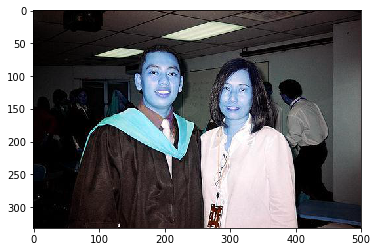

In [2]:
img_init = cv2.imread('data_folder/1007270_99118848fd.jpg') #testing the path
plt.imshow(img_init,cmap='gray')

# Augmentation:

In [41]:
#gen = ImageDataGenerator(rotation_range = 10,width_shift_range = 0.1,height_shift_range = 0.1,shear_range=0.15,
#                         zoom_range=0.1,channel_shift_range=10.,horizontal_flip = True) 

gen = ImageDataGenerator(horizontal_flip = True)#,rotation_range = 20,width_shift_range = 0.1,height_shift_range = 0.1,shear_range=0.15,
#                         zoom_range=0.1,channel_shift_range=10.,horizontal_flip = True)

In [42]:
image = np.expand_dims(img_init,0)


In [43]:
aug_iter = gen.flow(image)

In [44]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(2)]

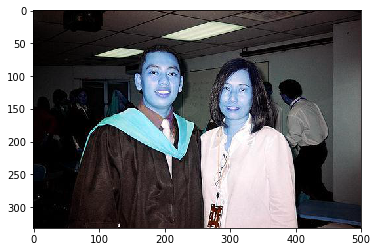

In [46]:
plt.imshow(aug_images[0])

# defining the data replacing the classes to numbers ['graduation','picnic','meeting'] -> [0,1,2]

In [47]:
data0 = pd.read_csv('dataset_images_minitest.csv',sep='\t')
category = ['graduation','picnic','meeting']
img_list = ['data_folder/' + data0['filename'][i] for i in range(data0.shape[0])]   #SAMPLEMAX = data0.shape[0]

classes = [data0['category'][i] for i in range(data0.shape[0])] 

data_class = pd.DataFrame({'category':classes})
data_class = data_class.replace(category[0],0) 
data_class = data_class.replace(category[1],1)
data_class = data_class.replace(category[2],2)

class_num  = [data_class['category'][i] for i in range(data0.shape[0])]

data_img = pd.DataFrame({'Img' : img_list})

data_final = pd.concat([data_class, data_img], axis=1)


In [48]:
data_final.head()

,category,Img
0,0,data_folder/1007270_99118848fd.jpg
1,0,data_folder/1007274_075d925378.jpg
2,0,data_folder/1009219698_b40b9e6d87.jpg
3,0,data_folder/10100422_0feca68bfb.jpg
4,0,data_folder/10100587_48faabb61a.jpg


## Here we have a list of imgs (img_list) addresses and the class of each one (class_num)

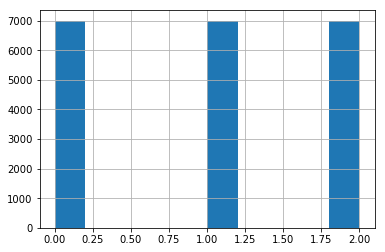

In [49]:
data_final['category'].hist()

In [50]:
# testing the augment in an img element
tt= []
tipo = class_num[0]                                            #class of the img

#for imagem in data_final.Img:
#    for i in range(10):
img_array_t = cv2.imread(img_list[0] )                             #open img   
new_array_t = cv2.resize(img_array_t,(IMG_SIZE,IMG_SIZE))          #expand img 
img_read_t = np.expand_dims(new_array_t,0)                         #resize img
aug_iter_t = gen.flow(img_read_t)                                  #augmentation
aug_img_t = [next(aug_iter_t)[0].astype(np.uint8) for j in range(2)]                #list of new igms
for elem in aug_img_t:
    tt.append([elem,tipo])


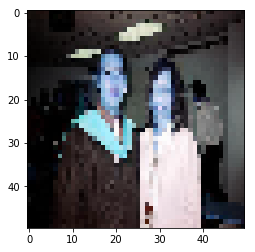

In [52]:
plt.imshow(tt[0][0])

# Creating the augmented data:

In [54]:
import random
RANGE = len(img_list)
list_rand = [np.random.randint(len(img_list)) for i in range(RANGE)]
list_rand[int(RANGE-1)]

13200

In [55]:

training_data = []


def creating_training_data():
    for i in list_rand:  
        try:
            img_array_t = cv2.imread(img_list[i] )                             #open img   
            new_array_t = cv2.resize(img_array_t,(IMG_SIZE,IMG_SIZE))          #expand img 
            img_read_t = np.expand_dims(new_array_t,0)                         #resize img
            aug_iter_t = gen.flow(img_read_t)                                  #augmentation
            aug_img_t = [next(aug_iter_t)[0].astype(np.uint8) for j in range(2)]
            tipo = class_num[i]
            for elem in aug_img_t:
                training_data.append([elem,tipo])                    #append all imgs
        except Exception as e:   #I should put some warning here
                pass

creating_training_data()

In [56]:
data_aug = pd.DataFrame(training_data,columns=['img','tipo'])


# shuffling the data

In [57]:
import random

random.shuffle(training_data)

In [58]:
X = []
y = []

for imgs,types in training_data:
    
    y.append(types)
    X.append(imgs)

#X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print(len(X),len(y))

41974 41974


In [59]:
#saving the data

import pickle

pickle_out = open("Xaug.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("yaug.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
#loading the saved data

#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)
#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

# Data saved. Now we can construct our CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential  # for a sequential model 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
#import os
#import cv2
#from tqdm import tqdm
#import pandas as pd

import pickle

pickle_in = open("Xaug.pickle","rb")
X_aug = pickle.load(pickle_in)

pickle_in = open("yaug.pickle","rb")
y_aug = pickle.load(pickle_in)

X_aug = np.array(X_aug)/255.0 #normalizing data

y_aug = np.array(y_aug)

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
X_aug.shape[0], len(y_aug)

(41974, 41974)

# data_test and data_train

In [ ]:
df = 10
X_test = np.array([X_aug[i] for i in range((len(X_aug)//df))])
X_train = np.array([X_aug[i] for i in range((len(X_aug)//df),len(X_aug))])

y_test = np.array([y_aug[i] for i in range((len(y_aug)//df))])
y_train = np.array([y_aug[i] for i in range((len(y_aug)//df),len(y_aug))])

In [5]:
X_train.shape,y_train.shape

((37777, 50, 50, 3), (37777,))

In [6]:
X_test.shape,y_test.shape

((4197, 50, 50, 3), (4197,))

# Tensorboard

In [7]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "first-puzzle-cnn-aug-dr3-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logfp/{}'.format(NAME))

# The Convolutional NN model:

In [9]:
#The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_test.shape[1:]))   #convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))                                 # convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.1))                                       # dropout 10% of the neurons

model.add(Conv2D(256, (3, 3)))                                 # convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())                                       # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.1))                                   # dropout 10% of the neurons

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))                                  # dropout 20% of the neurons

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

my_model_aug = model.fit(X_train, y_train, batch_size=32, epochs=20,validation_split=0.3,callbacks=[tensorboard])

Train on 26443 samples, validate on 11334 samples
Epoch 1/20


 6496/26443 [======>.......................] - ETA: 1:13:21 - loss: 1.0887 - acc: 0.43 - ETA: 48:36 - loss: 1.0916 - acc: 0.4688 - ETA: 40:38 - loss: 1.1032 - acc: 0.40 - ETA: 36:20 - loss: 1.1457 - acc: 0.39 - ETA: 33:51 - loss: 1.1488 - acc: 0.36 - ETA: 32:02 - loss: 1.1364 - acc: 0.39 - ETA: 30:59 - loss: 1.1327 - acc: 0.37 - ETA: 30:07 - loss: 1.1296 - acc: 0.35 - ETA: 29:19 - loss: 1.1263 - acc: 0.35 - ETA: 28:48 - loss: 1.1225 - acc: 0.36 - ETA: 28:21 - loss: 1.1204 - acc: 0.35 - ETA: 28:19 - loss: 1.1182 - acc: 0.35 - ETA: 28:26 - loss: 1.1160 - acc: 0.36 - ETA: 28:19 - loss: 1.1146 - acc: 0.35 - ETA: 28:11 - loss: 1.1134 - acc: 0.35 - ETA: 27:50 - loss: 1.1149 - acc: 0.34 - ETA: 27:34 - loss: 1.1133 - acc: 0.35 - ETA: 27:15 - loss: 1.1137 - acc: 0.34 - ETA: 26:58 - loss: 1.1137 - acc: 0.34 - ETA: 26:44 - loss: 1.1129 - acc: 0.34 - ETA: 26:32 - loss: 1.1124 - acc: 0.34 - ETA: 26:20 - loss: 1.1118 - acc: 0.33 - ETA: 26:11 - loss: 1.1112 - acc: 0.34 - ETA: 26:00 - loss: 1.1108 - a

19552/26443 [=====================>........] - ETA: 12:30 - loss: 1.0123 - acc: 0.48 - ETA: 12:28 - loss: 1.0122 - acc: 0.48 - ETA: 12:26 - loss: 1.0120 - acc: 0.48 - ETA: 12:24 - loss: 1.0117 - acc: 0.48 - ETA: 12:22 - loss: 1.0115 - acc: 0.48 - ETA: 12:20 - loss: 1.0117 - acc: 0.48 - ETA: 12:18 - loss: 1.0117 - acc: 0.48 - ETA: 12:16 - loss: 1.0117 - acc: 0.48 - ETA: 12:14 - loss: 1.0116 - acc: 0.48 - ETA: 12:12 - loss: 1.0116 - acc: 0.48 - ETA: 12:11 - loss: 1.0116 - acc: 0.48 - ETA: 12:09 - loss: 1.0112 - acc: 0.48 - ETA: 12:07 - loss: 1.0110 - acc: 0.48 - ETA: 12:05 - loss: 1.0110 - acc: 0.48 - ETA: 12:03 - loss: 1.0108 - acc: 0.48 - ETA: 12:01 - loss: 1.0104 - acc: 0.48 - ETA: 11:59 - loss: 1.0107 - acc: 0.48 - ETA: 11:57 - loss: 1.0107 - acc: 0.48 - ETA: 11:55 - loss: 1.0103 - acc: 0.48 - ETA: 11:53 - loss: 1.0099 - acc: 0.48 - ETA: 11:51 - loss: 1.0094 - acc: 0.48 - ETA: 11:50 - loss: 1.0094 - acc: 0.48 - ETA: 11:48 - loss: 1.0093 - acc: 0.48 - ETA: 11:46 - loss: 1.0089 - acc: 

26112/26443 [============================>.] - ETA: 6:16 - loss: 0.9803 - acc: 0.511 - ETA: 6:14 - loss: 0.9802 - acc: 0.511 - ETA: 6:12 - loss: 0.9801 - acc: 0.511 - ETA: 6:10 - loss: 0.9799 - acc: 0.511 - ETA: 6:09 - loss: 0.9799 - acc: 0.511 - ETA: 6:07 - loss: 0.9797 - acc: 0.511 - ETA: 6:05 - loss: 0.9796 - acc: 0.511 - ETA: 6:03 - loss: 0.9794 - acc: 0.512 - ETA: 6:01 - loss: 0.9794 - acc: 0.512 - ETA: 6:00 - loss: 0.9794 - acc: 0.512 - ETA: 5:58 - loss: 0.9792 - acc: 0.512 - ETA: 5:56 - loss: 0.9790 - acc: 0.512 - ETA: 5:54 - loss: 0.9787 - acc: 0.512 - ETA: 5:52 - loss: 0.9784 - acc: 0.512 - ETA: 5:51 - loss: 0.9781 - acc: 0.513 - ETA: 5:49 - loss: 0.9781 - acc: 0.513 - ETA: 5:47 - loss: 0.9778 - acc: 0.513 - ETA: 5:45 - loss: 0.9778 - acc: 0.513 - ETA: 5:43 - loss: 0.9775 - acc: 0.513 - ETA: 5:42 - loss: 0.9775 - acc: 0.513 - ETA: 5:40 - loss: 0.9772 - acc: 0.513 - ETA: 5:38 - loss: 0.9770 - acc: 0.513 - ETA: 5:36 - loss: 0.9766 - acc: 0.514 - ETA: 5:34 - loss: 0.9768 - acc: 0

26443/26443 [==============================] - ETA: 16s - loss: 0.9503 - acc: 0.53 - ETA: 14s - loss: 0.9500 - acc: 0.53 - ETA: 12s - loss: 0.9502 - acc: 0.53 - ETA: 11s - loss: 0.9501 - acc: 0.53 - ETA: 9s - loss: 0.9499 - acc: 0.5352 - ETA: 7s - loss: 0.9499 - acc: 0.535 - ETA: 5s - loss: 0.9499 - acc: 0.535 - ETA: 4s - loss: 0.9497 - acc: 0.535 - ETA: 2s - loss: 0.9494 - acc: 0.535 - ETA: 0s - loss: 0.9492 - acc: 0.535 - 1635s 62ms/step - loss: 0.9492 - acc: 0.5355 - val_loss: 0.8391 - val_acc: 0.6315
Epoch 2/20


 6528/26443 [======>.......................] - ETA: 24:30 - loss: 0.9133 - acc: 0.46 - ETA: 26:27 - loss: 0.8533 - acc: 0.59 - ETA: 26:55 - loss: 0.8470 - acc: 0.60 - ETA: 26:49 - loss: 0.8670 - acc: 0.59 - ETA: 26:39 - loss: 0.8898 - acc: 0.58 - ETA: 26:51 - loss: 0.8784 - acc: 0.59 - ETA: 26:52 - loss: 0.8663 - acc: 0.59 - ETA: 26:38 - loss: 0.8770 - acc: 0.57 - ETA: 26:52 - loss: 0.8629 - acc: 0.60 - ETA: 26:42 - loss: 0.8473 - acc: 0.60 - ETA: 26:41 - loss: 0.8342 - acc: 0.61 - ETA: 26:42 - loss: 0.8364 - acc: 0.60 - ETA: 26:44 - loss: 0.8392 - acc: 0.60 - ETA: 26:43 - loss: 0.8420 - acc: 0.60 - ETA: 26:44 - loss: 0.8490 - acc: 0.60 - ETA: 26:33 - loss: 0.8494 - acc: 0.59 - ETA: 26:31 - loss: 0.8500 - acc: 0.59 - ETA: 26:24 - loss: 0.8365 - acc: 0.60 - ETA: 26:25 - loss: 0.8334 - acc: 0.61 - ETA: 26:26 - loss: 0.8453 - acc: 0.60 - ETA: 26:27 - loss: 0.8345 - acc: 0.61 - ETA: 26:26 - loss: 0.8350 - acc: 0.61 - ETA: 26:28 - loss: 0.8396 - acc: 0.60 - ETA: 26:33 - loss: 0.8293 - acc: 

19584/26443 [=====================>........] - ETA: 12:35 - loss: 0.8203 - acc: 0.63 - ETA: 12:33 - loss: 0.8197 - acc: 0.63 - ETA: 12:31 - loss: 0.8196 - acc: 0.63 - ETA: 12:29 - loss: 0.8195 - acc: 0.63 - ETA: 12:28 - loss: 0.8197 - acc: 0.63 - ETA: 12:26 - loss: 0.8197 - acc: 0.63 - ETA: 12:24 - loss: 0.8194 - acc: 0.63 - ETA: 12:23 - loss: 0.8191 - acc: 0.63 - ETA: 12:21 - loss: 0.8188 - acc: 0.63 - ETA: 12:20 - loss: 0.8188 - acc: 0.63 - ETA: 12:18 - loss: 0.8186 - acc: 0.63 - ETA: 12:16 - loss: 0.8188 - acc: 0.63 - ETA: 12:15 - loss: 0.8193 - acc: 0.63 - ETA: 12:13 - loss: 0.8197 - acc: 0.63 - ETA: 12:11 - loss: 0.8197 - acc: 0.63 - ETA: 12:09 - loss: 0.8195 - acc: 0.63 - ETA: 12:07 - loss: 0.8198 - acc: 0.63 - ETA: 12:05 - loss: 0.8200 - acc: 0.63 - ETA: 12:04 - loss: 0.8198 - acc: 0.63 - ETA: 12:02 - loss: 0.8199 - acc: 0.63 - ETA: 12:00 - loss: 0.8195 - acc: 0.63 - ETA: 11:58 - loss: 0.8197 - acc: 0.63 - ETA: 11:56 - loss: 0.8194 - acc: 0.63 - ETA: 11:54 - loss: 0.8194 - acc: 

26144/26443 [============================>.] - ETA: 6:23 - loss: 0.8139 - acc: 0.636 - ETA: 6:22 - loss: 0.8140 - acc: 0.636 - ETA: 6:20 - loss: 0.8138 - acc: 0.636 - ETA: 6:18 - loss: 0.8140 - acc: 0.636 - ETA: 6:16 - loss: 0.8137 - acc: 0.636 - ETA: 6:14 - loss: 0.8135 - acc: 0.636 - ETA: 6:12 - loss: 0.8132 - acc: 0.636 - ETA: 6:11 - loss: 0.8131 - acc: 0.636 - ETA: 6:09 - loss: 0.8129 - acc: 0.636 - ETA: 6:07 - loss: 0.8127 - acc: 0.636 - ETA: 6:05 - loss: 0.8124 - acc: 0.636 - ETA: 6:03 - loss: 0.8125 - acc: 0.637 - ETA: 6:02 - loss: 0.8123 - acc: 0.637 - ETA: 6:00 - loss: 0.8122 - acc: 0.637 - ETA: 5:58 - loss: 0.8119 - acc: 0.637 - ETA: 5:56 - loss: 0.8119 - acc: 0.637 - ETA: 5:54 - loss: 0.8117 - acc: 0.637 - ETA: 5:53 - loss: 0.8116 - acc: 0.637 - ETA: 5:51 - loss: 0.8114 - acc: 0.637 - ETA: 5:49 - loss: 0.8113 - acc: 0.638 - ETA: 5:47 - loss: 0.8115 - acc: 0.637 - ETA: 5:45 - loss: 0.8114 - acc: 0.638 - ETA: 5:43 - loss: 0.8114 - acc: 0.638 - ETA: 5:42 - loss: 0.8113 - acc: 0

26443/26443 [==============================] - ETA: 14s - loss: 0.8074 - acc: 0.64 - ETA: 13s - loss: 0.8074 - acc: 0.64 - ETA: 11s - loss: 0.8075 - acc: 0.64 - ETA: 9s - loss: 0.8075 - acc: 0.6418 - ETA: 7s - loss: 0.8074 - acc: 0.641 - ETA: 5s - loss: 0.8074 - acc: 0.641 - ETA: 4s - loss: 0.8073 - acc: 0.642 - ETA: 2s - loss: 0.8075 - acc: 0.642 - ETA: 0s - loss: 0.8076 - acc: 0.642 - 1649s 62ms/step - loss: 0.8075 - acc: 0.6421 - val_loss: 0.7499 - val_acc: 0.6818
Epoch 3/20


 6528/26443 [======>.......................] - ETA: 25:19 - loss: 0.5609 - acc: 0.81 - ETA: 24:39 - loss: 0.6895 - acc: 0.71 - ETA: 24:25 - loss: 0.6903 - acc: 0.69 - ETA: 24:17 - loss: 0.7182 - acc: 0.67 - ETA: 24:24 - loss: 0.6951 - acc: 0.69 - ETA: 24:17 - loss: 0.7084 - acc: 0.69 - ETA: 24:14 - loss: 0.7104 - acc: 0.70 - ETA: 24:08 - loss: 0.7382 - acc: 0.68 - ETA: 24:06 - loss: 0.7429 - acc: 0.68 - ETA: 24:02 - loss: 0.7150 - acc: 0.70 - ETA: 24:02 - loss: 0.7145 - acc: 0.70 - ETA: 23:57 - loss: 0.7504 - acc: 0.67 - ETA: 23:54 - loss: 0.7351 - acc: 0.68 - ETA: 23:50 - loss: 0.7500 - acc: 0.67 - ETA: 23:48 - loss: 0.7475 - acc: 0.67 - ETA: 23:46 - loss: 0.7422 - acc: 0.67 - ETA: 23:44 - loss: 0.7339 - acc: 0.68 - ETA: 23:41 - loss: 0.7352 - acc: 0.68 - ETA: 23:39 - loss: 0.7315 - acc: 0.68 - ETA: 23:36 - loss: 0.7273 - acc: 0.68 - ETA: 23:34 - loss: 0.7236 - acc: 0.68 - ETA: 23:32 - loss: 0.7215 - acc: 0.68 - ETA: 23:31 - loss: 0.7261 - acc: 0.67 - ETA: 23:28 - loss: 0.7208 - acc: 

19584/26443 [=====================>........] - ETA: 12:09 - loss: 0.7222 - acc: 0.68 - ETA: 12:08 - loss: 0.7218 - acc: 0.68 - ETA: 12:06 - loss: 0.7211 - acc: 0.68 - ETA: 12:04 - loss: 0.7211 - acc: 0.68 - ETA: 12:02 - loss: 0.7214 - acc: 0.68 - ETA: 12:01 - loss: 0.7215 - acc: 0.68 - ETA: 11:59 - loss: 0.7212 - acc: 0.68 - ETA: 11:57 - loss: 0.7213 - acc: 0.68 - ETA: 11:55 - loss: 0.7214 - acc: 0.68 - ETA: 11:54 - loss: 0.7215 - acc: 0.68 - ETA: 11:52 - loss: 0.7213 - acc: 0.68 - ETA: 11:50 - loss: 0.7208 - acc: 0.68 - ETA: 11:48 - loss: 0.7206 - acc: 0.68 - ETA: 11:46 - loss: 0.7208 - acc: 0.68 - ETA: 11:45 - loss: 0.7208 - acc: 0.68 - ETA: 11:43 - loss: 0.7207 - acc: 0.68 - ETA: 11:41 - loss: 0.7204 - acc: 0.68 - ETA: 11:40 - loss: 0.7206 - acc: 0.68 - ETA: 11:38 - loss: 0.7206 - acc: 0.68 - ETA: 11:36 - loss: 0.7206 - acc: 0.68 - ETA: 11:35 - loss: 0.7205 - acc: 0.68 - ETA: 11:33 - loss: 0.7202 - acc: 0.68 - ETA: 11:31 - loss: 0.7215 - acc: 0.68 - ETA: 11:29 - loss: 0.7213 - acc: 

26144/26443 [============================>.] - ETA: 6:12 - loss: 0.7244 - acc: 0.687 - ETA: 6:11 - loss: 0.7242 - acc: 0.687 - ETA: 6:09 - loss: 0.7239 - acc: 0.688 - ETA: 6:07 - loss: 0.7239 - acc: 0.688 - ETA: 6:05 - loss: 0.7239 - acc: 0.687 - ETA: 6:04 - loss: 0.7241 - acc: 0.687 - ETA: 6:02 - loss: 0.7240 - acc: 0.688 - ETA: 6:00 - loss: 0.7243 - acc: 0.687 - ETA: 5:58 - loss: 0.7240 - acc: 0.688 - ETA: 5:57 - loss: 0.7238 - acc: 0.688 - ETA: 5:55 - loss: 0.7242 - acc: 0.688 - ETA: 5:53 - loss: 0.7241 - acc: 0.688 - ETA: 5:51 - loss: 0.7238 - acc: 0.688 - ETA: 5:50 - loss: 0.7239 - acc: 0.688 - ETA: 5:48 - loss: 0.7237 - acc: 0.688 - ETA: 5:46 - loss: 0.7238 - acc: 0.688 - ETA: 5:44 - loss: 0.7240 - acc: 0.688 - ETA: 5:43 - loss: 0.7243 - acc: 0.687 - ETA: 5:41 - loss: 0.7241 - acc: 0.688 - ETA: 5:39 - loss: 0.7239 - acc: 0.688 - ETA: 5:37 - loss: 0.7239 - acc: 0.688 - ETA: 5:36 - loss: 0.7239 - acc: 0.688 - ETA: 5:34 - loss: 0.7240 - acc: 0.688 - ETA: 5:32 - loss: 0.7238 - acc: 0

26443/26443 [==============================] - ETA: 14s - loss: 0.7207 - acc: 0.68 - ETA: 12s - loss: 0.7205 - acc: 0.68 - ETA: 11s - loss: 0.7204 - acc: 0.69 - ETA: 9s - loss: 0.7201 - acc: 0.6903 - ETA: 7s - loss: 0.7205 - acc: 0.690 - ETA: 5s - loss: 0.7204 - acc: 0.690 - ETA: 4s - loss: 0.7203 - acc: 0.690 - ETA: 2s - loss: 0.7202 - acc: 0.690 - ETA: 0s - loss: 0.7203 - acc: 0.690 - 1614s 61ms/step - loss: 0.7203 - acc: 0.6904 - val_loss: 0.6972 - val_acc: 0.7073
Epoch 4/20


 6528/26443 [======>.......................] - ETA: 24:17 - loss: 0.5577 - acc: 0.81 - ETA: 24:11 - loss: 0.5709 - acc: 0.79 - ETA: 24:02 - loss: 0.5869 - acc: 0.78 - ETA: 24:08 - loss: 0.5982 - acc: 0.75 - ETA: 24:04 - loss: 0.6215 - acc: 0.75 - ETA: 24:08 - loss: 0.6196 - acc: 0.73 - ETA: 24:05 - loss: 0.6001 - acc: 0.75 - ETA: 24:01 - loss: 0.5783 - acc: 0.76 - ETA: 23:59 - loss: 0.5742 - acc: 0.77 - ETA: 23:58 - loss: 0.5861 - acc: 0.77 - ETA: 23:54 - loss: 0.5931 - acc: 0.76 - ETA: 23:51 - loss: 0.6207 - acc: 0.76 - ETA: 23:49 - loss: 0.6119 - acc: 0.77 - ETA: 23:46 - loss: 0.6148 - acc: 0.76 - ETA: 23:44 - loss: 0.6162 - acc: 0.76 - ETA: 23:41 - loss: 0.6095 - acc: 0.76 - ETA: 23:39 - loss: 0.6124 - acc: 0.76 - ETA: 23:37 - loss: 0.6287 - acc: 0.75 - ETA: 23:35 - loss: 0.6243 - acc: 0.75 - ETA: 23:33 - loss: 0.6200 - acc: 0.75 - ETA: 23:31 - loss: 0.6232 - acc: 0.75 - ETA: 23:30 - loss: 0.6250 - acc: 0.75 - ETA: 23:28 - loss: 0.6491 - acc: 0.74 - ETA: 23:25 - loss: 0.6476 - acc: 

19584/26443 [=====================>........] - ETA: 12:09 - loss: 0.6357 - acc: 0.73 - ETA: 12:07 - loss: 0.6360 - acc: 0.73 - ETA: 12:05 - loss: 0.6363 - acc: 0.73 - ETA: 12:03 - loss: 0.6360 - acc: 0.73 - ETA: 12:02 - loss: 0.6362 - acc: 0.73 - ETA: 12:00 - loss: 0.6363 - acc: 0.73 - ETA: 11:58 - loss: 0.6370 - acc: 0.73 - ETA: 11:56 - loss: 0.6370 - acc: 0.73 - ETA: 11:55 - loss: 0.6370 - acc: 0.73 - ETA: 11:53 - loss: 0.6372 - acc: 0.73 - ETA: 11:51 - loss: 0.6376 - acc: 0.73 - ETA: 11:49 - loss: 0.6381 - acc: 0.73 - ETA: 11:48 - loss: 0.6380 - acc: 0.73 - ETA: 11:46 - loss: 0.6379 - acc: 0.73 - ETA: 11:44 - loss: 0.6377 - acc: 0.73 - ETA: 11:42 - loss: 0.6381 - acc: 0.73 - ETA: 11:41 - loss: 0.6380 - acc: 0.73 - ETA: 11:39 - loss: 0.6384 - acc: 0.73 - ETA: 11:37 - loss: 0.6386 - acc: 0.73 - ETA: 11:35 - loss: 0.6390 - acc: 0.73 - ETA: 11:34 - loss: 0.6391 - acc: 0.73 - ETA: 11:32 - loss: 0.6389 - acc: 0.73 - ETA: 11:30 - loss: 0.6389 - acc: 0.73 - ETA: 11:28 - loss: 0.6389 - acc: 

26144/26443 [============================>.] - ETA: 6:12 - loss: 0.6348 - acc: 0.738 - ETA: 6:11 - loss: 0.6347 - acc: 0.737 - ETA: 6:09 - loss: 0.6346 - acc: 0.737 - ETA: 6:07 - loss: 0.6345 - acc: 0.737 - ETA: 6:05 - loss: 0.6344 - acc: 0.737 - ETA: 6:04 - loss: 0.6343 - acc: 0.738 - ETA: 6:02 - loss: 0.6338 - acc: 0.738 - ETA: 6:00 - loss: 0.6340 - acc: 0.738 - ETA: 5:58 - loss: 0.6339 - acc: 0.738 - ETA: 5:56 - loss: 0.6340 - acc: 0.738 - ETA: 5:55 - loss: 0.6341 - acc: 0.738 - ETA: 5:53 - loss: 0.6339 - acc: 0.738 - ETA: 5:51 - loss: 0.6340 - acc: 0.738 - ETA: 5:49 - loss: 0.6345 - acc: 0.738 - ETA: 5:48 - loss: 0.6348 - acc: 0.738 - ETA: 5:46 - loss: 0.6351 - acc: 0.738 - ETA: 5:44 - loss: 0.6351 - acc: 0.738 - ETA: 5:42 - loss: 0.6350 - acc: 0.738 - ETA: 5:40 - loss: 0.6351 - acc: 0.737 - ETA: 5:39 - loss: 0.6359 - acc: 0.737 - ETA: 5:37 - loss: 0.6360 - acc: 0.737 - ETA: 5:35 - loss: 0.6364 - acc: 0.737 - ETA: 5:33 - loss: 0.6363 - acc: 0.737 - ETA: 5:31 - loss: 0.6363 - acc: 0

26443/26443 [==============================] - ETA: 14s - loss: 0.6285 - acc: 0.73 - ETA: 12s - loss: 0.6285 - acc: 0.73 - ETA: 10s - loss: 0.6284 - acc: 0.73 - ETA: 9s - loss: 0.6283 - acc: 0.7399 - ETA: 7s - loss: 0.6282 - acc: 0.739 - ETA: 5s - loss: 0.6282 - acc: 0.739 - ETA: 4s - loss: 0.6279 - acc: 0.740 - ETA: 2s - loss: 0.6277 - acc: 0.740 - ETA: 0s - loss: 0.6275 - acc: 0.740 - 1568s 59ms/step - loss: 0.6275 - acc: 0.7403 - val_loss: 0.6348 - val_acc: 0.7390
Epoch 5/20


 6528/26443 [======>.......................] - ETA: 22:12 - loss: 0.5888 - acc: 0.75 - ETA: 22:03 - loss: 0.5475 - acc: 0.76 - ETA: 21:53 - loss: 0.5238 - acc: 0.79 - ETA: 22:00 - loss: 0.5486 - acc: 0.78 - ETA: 21:57 - loss: 0.5710 - acc: 0.75 - ETA: 21:54 - loss: 0.6196 - acc: 0.72 - ETA: 21:49 - loss: 0.5945 - acc: 0.74 - ETA: 21:47 - loss: 0.5780 - acc: 0.74 - ETA: 21:45 - loss: 0.5789 - acc: 0.74 - ETA: 21:41 - loss: 0.5766 - acc: 0.74 - ETA: 21:39 - loss: 0.5607 - acc: 0.75 - ETA: 21:37 - loss: 0.5618 - acc: 0.75 - ETA: 21:37 - loss: 0.5552 - acc: 0.75 - ETA: 21:35 - loss: 0.5528 - acc: 0.75 - ETA: 21:35 - loss: 0.5467 - acc: 0.75 - ETA: 21:33 - loss: 0.5390 - acc: 0.76 - ETA: 21:30 - loss: 0.5437 - acc: 0.76 - ETA: 21:28 - loss: 0.5387 - acc: 0.76 - ETA: 21:27 - loss: 0.5337 - acc: 0.76 - ETA: 21:24 - loss: 0.5282 - acc: 0.77 - ETA: 21:22 - loss: 0.5401 - acc: 0.77 - ETA: 21:23 - loss: 0.5394 - acc: 0.77 - ETA: 21:22 - loss: 0.5344 - acc: 0.77 - ETA: 21:20 - loss: 0.5408 - acc: 

19584/26443 [=====================>........] - ETA: 11:02 - loss: 0.5329 - acc: 0.78 - ETA: 11:01 - loss: 0.5326 - acc: 0.78 - ETA: 10:59 - loss: 0.5327 - acc: 0.78 - ETA: 10:58 - loss: 0.5324 - acc: 0.78 - ETA: 10:56 - loss: 0.5325 - acc: 0.78 - ETA: 10:54 - loss: 0.5329 - acc: 0.78 - ETA: 10:53 - loss: 0.5329 - acc: 0.78 - ETA: 10:51 - loss: 0.5328 - acc: 0.78 - ETA: 10:50 - loss: 0.5330 - acc: 0.78 - ETA: 10:48 - loss: 0.5328 - acc: 0.78 - ETA: 10:46 - loss: 0.5331 - acc: 0.78 - ETA: 10:45 - loss: 0.5330 - acc: 0.78 - ETA: 10:43 - loss: 0.5325 - acc: 0.78 - ETA: 10:42 - loss: 0.5324 - acc: 0.78 - ETA: 10:40 - loss: 0.5326 - acc: 0.78 - ETA: 10:38 - loss: 0.5328 - acc: 0.78 - ETA: 10:37 - loss: 0.5323 - acc: 0.78 - ETA: 10:35 - loss: 0.5328 - acc: 0.78 - ETA: 10:34 - loss: 0.5328 - acc: 0.78 - ETA: 10:32 - loss: 0.5327 - acc: 0.78 - ETA: 10:30 - loss: 0.5328 - acc: 0.78 - ETA: 10:29 - loss: 0.5330 - acc: 0.78 - ETA: 10:27 - loss: 0.5327 - acc: 0.78 - ETA: 10:26 - loss: 0.5327 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.5323 - acc: 0.785 - ETA: 5:36 - loss: 0.5322 - acc: 0.785 - ETA: 5:35 - loss: 0.5320 - acc: 0.785 - ETA: 5:33 - loss: 0.5319 - acc: 0.785 - ETA: 5:32 - loss: 0.5318 - acc: 0.785 - ETA: 5:30 - loss: 0.5318 - acc: 0.785 - ETA: 5:29 - loss: 0.5317 - acc: 0.785 - ETA: 5:27 - loss: 0.5319 - acc: 0.785 - ETA: 5:25 - loss: 0.5319 - acc: 0.784 - ETA: 5:24 - loss: 0.5317 - acc: 0.784 - ETA: 5:22 - loss: 0.5323 - acc: 0.784 - ETA: 5:21 - loss: 0.5322 - acc: 0.784 - ETA: 5:19 - loss: 0.5322 - acc: 0.784 - ETA: 5:17 - loss: 0.5321 - acc: 0.784 - ETA: 5:16 - loss: 0.5319 - acc: 0.784 - ETA: 5:14 - loss: 0.5318 - acc: 0.784 - ETA: 5:13 - loss: 0.5314 - acc: 0.785 - ETA: 5:11 - loss: 0.5313 - acc: 0.785 - ETA: 5:09 - loss: 0.5313 - acc: 0.785 - ETA: 5:08 - loss: 0.5316 - acc: 0.785 - ETA: 5:06 - loss: 0.5317 - acc: 0.785 - ETA: 5:05 - loss: 0.5314 - acc: 0.785 - ETA: 5:03 - loss: 0.5312 - acc: 0.785 - ETA: 5:02 - loss: 0.5314 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.5273 - acc: 0.78 - ETA: 10s - loss: 0.5272 - acc: 0.78 - ETA: 8s - loss: 0.5274 - acc: 0.7872 - ETA: 6s - loss: 0.5274 - acc: 0.787 - ETA: 5s - loss: 0.5275 - acc: 0.787 - ETA: 3s - loss: 0.5276 - acc: 0.787 - ETA: 2s - loss: 0.5274 - acc: 0.787 - ETA: 0s - loss: 0.5273 - acc: 0.787 - 1465s 55ms/step - loss: 0.5273 - acc: 0.7872 - val_loss: 0.5900 - val_acc: 0.7682
Epoch 6/20


 6528/26443 [======>.......................] - ETA: 21:19 - loss: 0.4521 - acc: 0.75 - ETA: 21:29 - loss: 0.4587 - acc: 0.78 - ETA: 21:33 - loss: 0.4523 - acc: 0.80 - ETA: 21:37 - loss: 0.4894 - acc: 0.78 - ETA: 21:39 - loss: 0.4883 - acc: 0.79 - ETA: 21:36 - loss: 0.4866 - acc: 0.80 - ETA: 21:40 - loss: 0.4828 - acc: 0.80 - ETA: 21:37 - loss: 0.4617 - acc: 0.82 - ETA: 21:34 - loss: 0.4489 - acc: 0.83 - ETA: 21:32 - loss: 0.4362 - acc: 0.84 - ETA: 21:30 - loss: 0.4267 - acc: 0.84 - ETA: 21:28 - loss: 0.4194 - acc: 0.84 - ETA: 21:27 - loss: 0.4130 - acc: 0.85 - ETA: 21:33 - loss: 0.4178 - acc: 0.85 - ETA: 21:30 - loss: 0.4162 - acc: 0.85 - ETA: 21:27 - loss: 0.4183 - acc: 0.85 - ETA: 21:26 - loss: 0.4187 - acc: 0.85 - ETA: 21:24 - loss: 0.4191 - acc: 0.84 - ETA: 21:23 - loss: 0.4255 - acc: 0.84 - ETA: 21:21 - loss: 0.4257 - acc: 0.84 - ETA: 21:18 - loss: 0.4235 - acc: 0.84 - ETA: 21:16 - loss: 0.4318 - acc: 0.83 - ETA: 21:14 - loss: 0.4363 - acc: 0.83 - ETA: 21:13 - loss: 0.4430 - acc: 

19584/26443 [=====================>........] - ETA: 11:03 - loss: 0.4296 - acc: 0.82 - ETA: 11:01 - loss: 0.4298 - acc: 0.82 - ETA: 11:00 - loss: 0.4295 - acc: 0.82 - ETA: 10:58 - loss: 0.4301 - acc: 0.82 - ETA: 10:57 - loss: 0.4303 - acc: 0.82 - ETA: 10:55 - loss: 0.4306 - acc: 0.82 - ETA: 10:54 - loss: 0.4310 - acc: 0.82 - ETA: 10:52 - loss: 0.4306 - acc: 0.82 - ETA: 10:51 - loss: 0.4301 - acc: 0.82 - ETA: 10:49 - loss: 0.4308 - acc: 0.82 - ETA: 10:48 - loss: 0.4306 - acc: 0.82 - ETA: 10:46 - loss: 0.4303 - acc: 0.82 - ETA: 10:44 - loss: 0.4307 - acc: 0.82 - ETA: 10:43 - loss: 0.4305 - acc: 0.82 - ETA: 10:41 - loss: 0.4307 - acc: 0.82 - ETA: 10:40 - loss: 0.4302 - acc: 0.82 - ETA: 10:38 - loss: 0.4300 - acc: 0.82 - ETA: 10:36 - loss: 0.4298 - acc: 0.82 - ETA: 10:35 - loss: 0.4301 - acc: 0.82 - ETA: 10:33 - loss: 0.4301 - acc: 0.82 - ETA: 10:32 - loss: 0.4301 - acc: 0.82 - ETA: 10:30 - loss: 0.4303 - acc: 0.82 - ETA: 10:28 - loss: 0.4301 - acc: 0.82 - ETA: 10:27 - loss: 0.4302 - acc: 

26176/26443 [============================>.] - ETA: 5:39 - loss: 0.4300 - acc: 0.830 - ETA: 5:37 - loss: 0.4302 - acc: 0.830 - ETA: 5:35 - loss: 0.4300 - acc: 0.830 - ETA: 5:34 - loss: 0.4300 - acc: 0.830 - ETA: 5:32 - loss: 0.4299 - acc: 0.830 - ETA: 5:31 - loss: 0.4298 - acc: 0.830 - ETA: 5:29 - loss: 0.4297 - acc: 0.830 - ETA: 5:27 - loss: 0.4297 - acc: 0.830 - ETA: 5:26 - loss: 0.4296 - acc: 0.830 - ETA: 5:24 - loss: 0.4296 - acc: 0.830 - ETA: 5:23 - loss: 0.4297 - acc: 0.830 - ETA: 5:21 - loss: 0.4295 - acc: 0.830 - ETA: 5:20 - loss: 0.4295 - acc: 0.830 - ETA: 5:18 - loss: 0.4294 - acc: 0.830 - ETA: 5:16 - loss: 0.4295 - acc: 0.830 - ETA: 5:15 - loss: 0.4294 - acc: 0.830 - ETA: 5:13 - loss: 0.4294 - acc: 0.830 - ETA: 5:12 - loss: 0.4293 - acc: 0.830 - ETA: 5:10 - loss: 0.4294 - acc: 0.830 - ETA: 5:08 - loss: 0.4296 - acc: 0.830 - ETA: 5:07 - loss: 0.4297 - acc: 0.830 - ETA: 5:05 - loss: 0.4297 - acc: 0.830 - ETA: 5:04 - loss: 0.4298 - acc: 0.830 - ETA: 5:02 - loss: 0.4298 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.4320 - acc: 0.83 - ETA: 10s - loss: 0.4324 - acc: 0.83 - ETA: 8s - loss: 0.4325 - acc: 0.8301 - ETA: 6s - loss: 0.4324 - acc: 0.830 - ETA: 5s - loss: 0.4324 - acc: 0.830 - ETA: 3s - loss: 0.4322 - acc: 0.830 - ETA: 2s - loss: 0.4325 - acc: 0.830 - ETA: 0s - loss: 0.4324 - acc: 0.830 - 1465s 55ms/step - loss: 0.4324 - acc: 0.8299 - val_loss: 0.5722 - val_acc: 0.7893
Epoch 7/20


 6528/26443 [======>.......................] - ETA: 22:14 - loss: 0.3647 - acc: 0.87 - ETA: 22:00 - loss: 0.4017 - acc: 0.85 - ETA: 22:11 - loss: 0.4213 - acc: 0.83 - ETA: 22:06 - loss: 0.3860 - acc: 0.85 - ETA: 21:57 - loss: 0.3747 - acc: 0.86 - ETA: 21:56 - loss: 0.3728 - acc: 0.85 - ETA: 21:51 - loss: 0.4150 - acc: 0.83 - ETA: 21:51 - loss: 0.4064 - acc: 0.83 - ETA: 21:49 - loss: 0.3854 - acc: 0.85 - ETA: 21:46 - loss: 0.3827 - acc: 0.84 - ETA: 21:43 - loss: 0.3727 - acc: 0.85 - ETA: 21:40 - loss: 0.3645 - acc: 0.85 - ETA: 21:40 - loss: 0.3711 - acc: 0.84 - ETA: 21:37 - loss: 0.3841 - acc: 0.84 - ETA: 21:43 - loss: 0.3785 - acc: 0.84 - ETA: 21:48 - loss: 0.3780 - acc: 0.84 - ETA: 21:45 - loss: 0.3759 - acc: 0.84 - ETA: 21:46 - loss: 0.3683 - acc: 0.84 - ETA: 21:44 - loss: 0.3693 - acc: 0.84 - ETA: 21:45 - loss: 0.3704 - acc: 0.84 - ETA: 22:00 - loss: 0.3671 - acc: 0.84 - ETA: 22:00 - loss: 0.3708 - acc: 0.84 - ETA: 21:57 - loss: 0.3615 - acc: 0.85 - ETA: 21:54 - loss: 0.3732 - acc: 

19584/26443 [=====================>........] - ETA: 11:02 - loss: 0.3481 - acc: 0.86 - ETA: 11:00 - loss: 0.3479 - acc: 0.86 - ETA: 10:58 - loss: 0.3479 - acc: 0.86 - ETA: 10:57 - loss: 0.3479 - acc: 0.86 - ETA: 10:55 - loss: 0.3480 - acc: 0.86 - ETA: 10:54 - loss: 0.3480 - acc: 0.86 - ETA: 10:52 - loss: 0.3481 - acc: 0.86 - ETA: 10:51 - loss: 0.3481 - acc: 0.86 - ETA: 10:49 - loss: 0.3482 - acc: 0.86 - ETA: 10:47 - loss: 0.3485 - acc: 0.86 - ETA: 10:46 - loss: 0.3483 - acc: 0.86 - ETA: 10:44 - loss: 0.3479 - acc: 0.86 - ETA: 10:43 - loss: 0.3481 - acc: 0.86 - ETA: 10:41 - loss: 0.3478 - acc: 0.86 - ETA: 10:39 - loss: 0.3473 - acc: 0.86 - ETA: 10:38 - loss: 0.3472 - acc: 0.86 - ETA: 10:36 - loss: 0.3471 - acc: 0.86 - ETA: 10:35 - loss: 0.3471 - acc: 0.86 - ETA: 10:33 - loss: 0.3473 - acc: 0.86 - ETA: 10:31 - loss: 0.3477 - acc: 0.86 - ETA: 10:30 - loss: 0.3483 - acc: 0.86 - ETA: 10:28 - loss: 0.3485 - acc: 0.86 - ETA: 10:27 - loss: 0.3485 - acc: 0.86 - ETA: 10:25 - loss: 0.3484 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.3537 - acc: 0.861 - ETA: 5:37 - loss: 0.3540 - acc: 0.861 - ETA: 5:35 - loss: 0.3540 - acc: 0.861 - ETA: 5:34 - loss: 0.3543 - acc: 0.861 - ETA: 5:32 - loss: 0.3540 - acc: 0.861 - ETA: 5:30 - loss: 0.3539 - acc: 0.861 - ETA: 5:29 - loss: 0.3537 - acc: 0.861 - ETA: 5:27 - loss: 0.3542 - acc: 0.861 - ETA: 5:26 - loss: 0.3544 - acc: 0.861 - ETA: 5:24 - loss: 0.3547 - acc: 0.861 - ETA: 5:22 - loss: 0.3547 - acc: 0.861 - ETA: 5:21 - loss: 0.3544 - acc: 0.861 - ETA: 5:19 - loss: 0.3544 - acc: 0.861 - ETA: 5:18 - loss: 0.3543 - acc: 0.861 - ETA: 5:16 - loss: 0.3542 - acc: 0.861 - ETA: 5:15 - loss: 0.3543 - acc: 0.861 - ETA: 5:13 - loss: 0.3545 - acc: 0.861 - ETA: 5:11 - loss: 0.3548 - acc: 0.861 - ETA: 5:10 - loss: 0.3547 - acc: 0.861 - ETA: 5:08 - loss: 0.3547 - acc: 0.861 - ETA: 5:07 - loss: 0.3550 - acc: 0.861 - ETA: 5:05 - loss: 0.3548 - acc: 0.861 - ETA: 5:03 - loss: 0.3546 - acc: 0.861 - ETA: 5:02 - loss: 0.3545 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.3561 - acc: 0.86 - ETA: 10s - loss: 0.3561 - acc: 0.86 - ETA: 8s - loss: 0.3560 - acc: 0.8611 - ETA: 6s - loss: 0.3557 - acc: 0.861 - ETA: 5s - loss: 0.3557 - acc: 0.861 - ETA: 3s - loss: 0.3559 - acc: 0.861 - ETA: 2s - loss: 0.3558 - acc: 0.861 - ETA: 0s - loss: 0.3559 - acc: 0.861 - 1467s 55ms/step - loss: 0.3559 - acc: 0.8612 - val_loss: 0.5724 - val_acc: 0.8049
Epoch 8/20


 6528/26443 [======>.......................] - ETA: 22:10 - loss: 0.2705 - acc: 0.90 - ETA: 22:08 - loss: 0.2325 - acc: 0.93 - ETA: 22:08 - loss: 0.2133 - acc: 0.93 - ETA: 22:00 - loss: 0.2357 - acc: 0.92 - ETA: 21:59 - loss: 0.2152 - acc: 0.93 - ETA: 21:53 - loss: 0.2264 - acc: 0.92 - ETA: 21:49 - loss: 0.2545 - acc: 0.91 - ETA: 21:46 - loss: 0.2527 - acc: 0.91 - ETA: 21:43 - loss: 0.2574 - acc: 0.90 - ETA: 21:41 - loss: 0.2533 - acc: 0.90 - ETA: 21:39 - loss: 0.2488 - acc: 0.90 - ETA: 21:38 - loss: 0.2501 - acc: 0.90 - ETA: 21:36 - loss: 0.2581 - acc: 0.90 - ETA: 21:33 - loss: 0.2498 - acc: 0.91 - ETA: 21:32 - loss: 0.2541 - acc: 0.91 - ETA: 21:33 - loss: 0.2570 - acc: 0.90 - ETA: 21:31 - loss: 0.2584 - acc: 0.90 - ETA: 21:28 - loss: 0.2543 - acc: 0.90 - ETA: 21:27 - loss: 0.2531 - acc: 0.90 - ETA: 21:24 - loss: 0.2499 - acc: 0.90 - ETA: 21:21 - loss: 0.2498 - acc: 0.90 - ETA: 21:20 - loss: 0.2514 - acc: 0.90 - ETA: 21:19 - loss: 0.2530 - acc: 0.90 - ETA: 21:17 - loss: 0.2554 - acc: 

19584/26443 [=====================>........] - ETA: 11:07 - loss: 0.3015 - acc: 0.88 - ETA: 11:05 - loss: 0.3009 - acc: 0.88 - ETA: 11:04 - loss: 0.3009 - acc: 0.88 - ETA: 11:02 - loss: 0.3015 - acc: 0.88 - ETA: 11:00 - loss: 0.3011 - acc: 0.88 - ETA: 10:59 - loss: 0.3010 - acc: 0.88 - ETA: 10:57 - loss: 0.3011 - acc: 0.88 - ETA: 10:56 - loss: 0.3009 - acc: 0.88 - ETA: 10:54 - loss: 0.3007 - acc: 0.88 - ETA: 10:53 - loss: 0.3009 - acc: 0.88 - ETA: 10:51 - loss: 0.3006 - acc: 0.88 - ETA: 10:49 - loss: 0.3003 - acc: 0.88 - ETA: 10:48 - loss: 0.3002 - acc: 0.88 - ETA: 10:46 - loss: 0.3001 - acc: 0.88 - ETA: 10:45 - loss: 0.3000 - acc: 0.88 - ETA: 10:43 - loss: 0.3000 - acc: 0.88 - ETA: 10:42 - loss: 0.3001 - acc: 0.88 - ETA: 10:40 - loss: 0.2998 - acc: 0.88 - ETA: 10:38 - loss: 0.2998 - acc: 0.88 - ETA: 10:37 - loss: 0.2998 - acc: 0.88 - ETA: 10:35 - loss: 0.3001 - acc: 0.88 - ETA: 10:34 - loss: 0.3000 - acc: 0.88 - ETA: 10:32 - loss: 0.2998 - acc: 0.88 - ETA: 10:31 - loss: 0.3000 - acc: 

26176/26443 [============================>.] - ETA: 5:40 - loss: 0.2992 - acc: 0.886 - ETA: 5:38 - loss: 0.2995 - acc: 0.886 - ETA: 5:37 - loss: 0.2995 - acc: 0.886 - ETA: 5:35 - loss: 0.2997 - acc: 0.886 - ETA: 5:33 - loss: 0.2996 - acc: 0.886 - ETA: 5:32 - loss: 0.2998 - acc: 0.885 - ETA: 5:30 - loss: 0.3000 - acc: 0.885 - ETA: 5:29 - loss: 0.2998 - acc: 0.885 - ETA: 5:27 - loss: 0.2998 - acc: 0.885 - ETA: 5:25 - loss: 0.2997 - acc: 0.885 - ETA: 5:24 - loss: 0.2997 - acc: 0.885 - ETA: 5:22 - loss: 0.2997 - acc: 0.885 - ETA: 5:21 - loss: 0.2997 - acc: 0.885 - ETA: 5:19 - loss: 0.2995 - acc: 0.885 - ETA: 5:17 - loss: 0.2992 - acc: 0.886 - ETA: 5:16 - loss: 0.2991 - acc: 0.886 - ETA: 5:14 - loss: 0.2992 - acc: 0.886 - ETA: 5:13 - loss: 0.2991 - acc: 0.886 - ETA: 5:11 - loss: 0.2992 - acc: 0.885 - ETA: 5:09 - loss: 0.2998 - acc: 0.885 - ETA: 5:08 - loss: 0.2996 - acc: 0.885 - ETA: 5:06 - loss: 0.2993 - acc: 0.886 - ETA: 5:05 - loss: 0.2992 - acc: 0.886 - ETA: 5:03 - loss: 0.2994 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.2993 - acc: 0.88 - ETA: 10s - loss: 0.2994 - acc: 0.88 - ETA: 8s - loss: 0.2995 - acc: 0.8860 - ETA: 6s - loss: 0.2994 - acc: 0.886 - ETA: 5s - loss: 0.2995 - acc: 0.886 - ETA: 3s - loss: 0.2993 - acc: 0.886 - ETA: 2s - loss: 0.2993 - acc: 0.886 - ETA: 0s - loss: 0.2993 - acc: 0.886 - 1468s 56ms/step - loss: 0.2995 - acc: 0.8861 - val_loss: 0.5387 - val_acc: 0.8256
Epoch 9/20


 6528/26443 [======>.......................] - ETA: 21:45 - loss: 0.3609 - acc: 0.87 - ETA: 21:41 - loss: 0.2699 - acc: 0.90 - ETA: 21:46 - loss: 0.2440 - acc: 0.90 - ETA: 21:44 - loss: 0.2361 - acc: 0.90 - ETA: 21:40 - loss: 0.2524 - acc: 0.90 - ETA: 21:38 - loss: 0.2483 - acc: 0.90 - ETA: 21:36 - loss: 0.2519 - acc: 0.90 - ETA: 21:33 - loss: 0.2457 - acc: 0.90 - ETA: 21:35 - loss: 0.2378 - acc: 0.91 - ETA: 21:34 - loss: 0.2437 - acc: 0.91 - ETA: 21:32 - loss: 0.2410 - acc: 0.90 - ETA: 21:29 - loss: 0.2430 - acc: 0.90 - ETA: 21:28 - loss: 0.2445 - acc: 0.90 - ETA: 21:25 - loss: 0.2355 - acc: 0.91 - ETA: 21:23 - loss: 0.2399 - acc: 0.90 - ETA: 21:21 - loss: 0.2316 - acc: 0.91 - ETA: 21:23 - loss: 0.2268 - acc: 0.91 - ETA: 21:20 - loss: 0.2240 - acc: 0.91 - ETA: 21:18 - loss: 0.2191 - acc: 0.91 - ETA: 21:16 - loss: 0.2194 - acc: 0.92 - ETA: 21:14 - loss: 0.2151 - acc: 0.92 - ETA: 21:12 - loss: 0.2138 - acc: 0.92 - ETA: 21:11 - loss: 0.2156 - acc: 0.92 - ETA: 21:09 - loss: 0.2125 - acc: 

19584/26443 [=====================>........] - ETA: 11:02 - loss: 0.2432 - acc: 0.91 - ETA: 11:00 - loss: 0.2429 - acc: 0.91 - ETA: 10:58 - loss: 0.2434 - acc: 0.91 - ETA: 10:57 - loss: 0.2437 - acc: 0.91 - ETA: 10:55 - loss: 0.2434 - acc: 0.91 - ETA: 10:54 - loss: 0.2431 - acc: 0.91 - ETA: 10:52 - loss: 0.2428 - acc: 0.91 - ETA: 10:50 - loss: 0.2426 - acc: 0.91 - ETA: 10:49 - loss: 0.2423 - acc: 0.91 - ETA: 10:47 - loss: 0.2422 - acc: 0.91 - ETA: 10:46 - loss: 0.2421 - acc: 0.91 - ETA: 10:44 - loss: 0.2422 - acc: 0.91 - ETA: 10:43 - loss: 0.2422 - acc: 0.91 - ETA: 10:41 - loss: 0.2430 - acc: 0.91 - ETA: 10:39 - loss: 0.2428 - acc: 0.91 - ETA: 10:38 - loss: 0.2430 - acc: 0.91 - ETA: 10:36 - loss: 0.2431 - acc: 0.91 - ETA: 10:35 - loss: 0.2428 - acc: 0.91 - ETA: 10:33 - loss: 0.2428 - acc: 0.91 - ETA: 10:31 - loss: 0.2428 - acc: 0.91 - ETA: 10:30 - loss: 0.2425 - acc: 0.91 - ETA: 10:28 - loss: 0.2426 - acc: 0.91 - ETA: 10:27 - loss: 0.2424 - acc: 0.91 - ETA: 10:25 - loss: 0.2424 - acc: 

26176/26443 [============================>.] - ETA: 5:40 - loss: 0.2424 - acc: 0.912 - ETA: 5:39 - loss: 0.2425 - acc: 0.912 - ETA: 5:37 - loss: 0.2426 - acc: 0.912 - ETA: 5:35 - loss: 0.2425 - acc: 0.912 - ETA: 5:34 - loss: 0.2426 - acc: 0.912 - ETA: 5:32 - loss: 0.2425 - acc: 0.912 - ETA: 5:31 - loss: 0.2426 - acc: 0.912 - ETA: 5:29 - loss: 0.2426 - acc: 0.912 - ETA: 5:27 - loss: 0.2425 - acc: 0.912 - ETA: 5:26 - loss: 0.2422 - acc: 0.912 - ETA: 5:24 - loss: 0.2421 - acc: 0.912 - ETA: 5:23 - loss: 0.2421 - acc: 0.912 - ETA: 5:21 - loss: 0.2420 - acc: 0.912 - ETA: 5:20 - loss: 0.2421 - acc: 0.912 - ETA: 5:18 - loss: 0.2422 - acc: 0.912 - ETA: 5:16 - loss: 0.2423 - acc: 0.912 - ETA: 5:15 - loss: 0.2426 - acc: 0.912 - ETA: 5:13 - loss: 0.2427 - acc: 0.912 - ETA: 5:12 - loss: 0.2427 - acc: 0.912 - ETA: 5:10 - loss: 0.2427 - acc: 0.912 - ETA: 5:08 - loss: 0.2426 - acc: 0.912 - ETA: 5:07 - loss: 0.2425 - acc: 0.912 - ETA: 5:05 - loss: 0.2426 - acc: 0.912 - ETA: 5:04 - loss: 0.2426 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.2420 - acc: 0.91 - ETA: 10s - loss: 0.2418 - acc: 0.91 - ETA: 8s - loss: 0.2419 - acc: 0.9116 - ETA: 6s - loss: 0.2418 - acc: 0.911 - ETA: 5s - loss: 0.2419 - acc: 0.911 - ETA: 3s - loss: 0.2419 - acc: 0.911 - ETA: 2s - loss: 0.2418 - acc: 0.911 - ETA: 0s - loss: 0.2420 - acc: 0.911 - 1470s 56ms/step - loss: 0.2420 - acc: 0.9114 - val_loss: 0.5759 - val_acc: 0.8308
Epoch 10/20


 6528/26443 [======>.......................] - ETA: 21:17 - loss: 0.0307 - acc: 1.00 - ETA: 21:22 - loss: 0.0851 - acc: 0.98 - ETA: 21:29 - loss: 0.1496 - acc: 0.94 - ETA: 21:27 - loss: 0.1654 - acc: 0.92 - ETA: 21:25 - loss: 0.1568 - acc: 0.93 - ETA: 21:27 - loss: 0.1746 - acc: 0.92 - ETA: 21:27 - loss: 0.1897 - acc: 0.91 - ETA: 21:27 - loss: 0.2149 - acc: 0.90 - ETA: 21:24 - loss: 0.2154 - acc: 0.90 - ETA: 21:24 - loss: 0.2040 - acc: 0.90 - ETA: 21:30 - loss: 0.2068 - acc: 0.91 - ETA: 21:31 - loss: 0.2008 - acc: 0.91 - ETA: 21:30 - loss: 0.1963 - acc: 0.91 - ETA: 21:29 - loss: 0.1993 - acc: 0.91 - ETA: 21:27 - loss: 0.1977 - acc: 0.91 - ETA: 21:26 - loss: 0.1945 - acc: 0.91 - ETA: 21:24 - loss: 0.1881 - acc: 0.92 - ETA: 21:23 - loss: 0.1839 - acc: 0.92 - ETA: 21:22 - loss: 0.1866 - acc: 0.92 - ETA: 21:21 - loss: 0.1925 - acc: 0.92 - ETA: 21:20 - loss: 0.1866 - acc: 0.92 - ETA: 21:21 - loss: 0.1899 - acc: 0.92 - ETA: 21:20 - loss: 0.1867 - acc: 0.92 - ETA: 21:18 - loss: 0.1848 - acc: 

19584/26443 [=====================>........] - ETA: 11:01 - loss: 0.2035 - acc: 0.92 - ETA: 11:00 - loss: 0.2034 - acc: 0.92 - ETA: 10:58 - loss: 0.2035 - acc: 0.92 - ETA: 10:56 - loss: 0.2037 - acc: 0.92 - ETA: 10:55 - loss: 0.2036 - acc: 0.92 - ETA: 10:53 - loss: 0.2035 - acc: 0.92 - ETA: 10:52 - loss: 0.2034 - acc: 0.92 - ETA: 10:50 - loss: 0.2032 - acc: 0.92 - ETA: 10:49 - loss: 0.2030 - acc: 0.92 - ETA: 10:47 - loss: 0.2027 - acc: 0.92 - ETA: 10:45 - loss: 0.2027 - acc: 0.92 - ETA: 10:44 - loss: 0.2027 - acc: 0.92 - ETA: 10:42 - loss: 0.2027 - acc: 0.92 - ETA: 10:41 - loss: 0.2029 - acc: 0.92 - ETA: 10:39 - loss: 0.2031 - acc: 0.92 - ETA: 10:37 - loss: 0.2033 - acc: 0.92 - ETA: 10:36 - loss: 0.2032 - acc: 0.92 - ETA: 10:34 - loss: 0.2029 - acc: 0.92 - ETA: 10:33 - loss: 0.2027 - acc: 0.92 - ETA: 10:31 - loss: 0.2027 - acc: 0.92 - ETA: 10:30 - loss: 0.2029 - acc: 0.92 - ETA: 10:28 - loss: 0.2028 - acc: 0.92 - ETA: 10:26 - loss: 0.2035 - acc: 0.92 - ETA: 10:25 - loss: 0.2038 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.2073 - acc: 0.921 - ETA: 5:36 - loss: 0.2073 - acc: 0.921 - ETA: 5:35 - loss: 0.2072 - acc: 0.921 - ETA: 5:33 - loss: 0.2072 - acc: 0.921 - ETA: 5:32 - loss: 0.2072 - acc: 0.921 - ETA: 5:30 - loss: 0.2070 - acc: 0.922 - ETA: 5:28 - loss: 0.2071 - acc: 0.922 - ETA: 5:27 - loss: 0.2075 - acc: 0.922 - ETA: 5:25 - loss: 0.2073 - acc: 0.922 - ETA: 5:24 - loss: 0.2072 - acc: 0.922 - ETA: 5:22 - loss: 0.2072 - acc: 0.922 - ETA: 5:21 - loss: 0.2072 - acc: 0.922 - ETA: 5:19 - loss: 0.2071 - acc: 0.922 - ETA: 5:17 - loss: 0.2069 - acc: 0.922 - ETA: 5:16 - loss: 0.2072 - acc: 0.922 - ETA: 5:14 - loss: 0.2075 - acc: 0.922 - ETA: 5:13 - loss: 0.2076 - acc: 0.922 - ETA: 5:11 - loss: 0.2075 - acc: 0.922 - ETA: 5:09 - loss: 0.2078 - acc: 0.922 - ETA: 5:08 - loss: 0.2078 - acc: 0.922 - ETA: 5:06 - loss: 0.2078 - acc: 0.922 - ETA: 5:05 - loss: 0.2081 - acc: 0.922 - ETA: 5:03 - loss: 0.2082 - acc: 0.921 - ETA: 5:01 - loss: 0.2085 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.2117 - acc: 0.92 - ETA: 10s - loss: 0.2117 - acc: 0.92 - ETA: 8s - loss: 0.2120 - acc: 0.9203 - ETA: 6s - loss: 0.2122 - acc: 0.920 - ETA: 5s - loss: 0.2122 - acc: 0.920 - ETA: 3s - loss: 0.2120 - acc: 0.920 - ETA: 2s - loss: 0.2121 - acc: 0.920 - ETA: 0s - loss: 0.2122 - acc: 0.920 - 1463s 55ms/step - loss: 0.2121 - acc: 0.9202 - val_loss: 0.5771 - val_acc: 0.8307
Epoch 11/20


 6528/26443 [======>.......................] - ETA: 21:09 - loss: 0.2527 - acc: 0.87 - ETA: 21:35 - loss: 0.2101 - acc: 0.90 - ETA: 21:35 - loss: 0.2451 - acc: 0.90 - ETA: 21:35 - loss: 0.2342 - acc: 0.90 - ETA: 21:32 - loss: 0.2142 - acc: 0.91 - ETA: 21:50 - loss: 0.2130 - acc: 0.91 - ETA: 21:47 - loss: 0.1993 - acc: 0.92 - ETA: 21:44 - loss: 0.2081 - acc: 0.92 - ETA: 21:40 - loss: 0.2101 - acc: 0.91 - ETA: 21:39 - loss: 0.2045 - acc: 0.91 - ETA: 21:36 - loss: 0.1928 - acc: 0.92 - ETA: 21:34 - loss: 0.1959 - acc: 0.92 - ETA: 21:32 - loss: 0.1934 - acc: 0.92 - ETA: 21:29 - loss: 0.1887 - acc: 0.92 - ETA: 21:27 - loss: 0.1953 - acc: 0.92 - ETA: 21:27 - loss: 0.1994 - acc: 0.91 - ETA: 21:25 - loss: 0.1916 - acc: 0.92 - ETA: 21:23 - loss: 0.1920 - acc: 0.92 - ETA: 21:21 - loss: 0.1939 - acc: 0.92 - ETA: 21:20 - loss: 0.1917 - acc: 0.92 - ETA: 21:19 - loss: 0.1891 - acc: 0.92 - ETA: 21:18 - loss: 0.1908 - acc: 0.92 - ETA: 21:16 - loss: 0.1880 - acc: 0.92 - ETA: 21:14 - loss: 0.1914 - acc: 

19584/26443 [=====================>........] - ETA: 11:01 - loss: 0.1852 - acc: 0.93 - ETA: 11:00 - loss: 0.1853 - acc: 0.93 - ETA: 10:58 - loss: 0.1851 - acc: 0.93 - ETA: 10:57 - loss: 0.1852 - acc: 0.93 - ETA: 10:55 - loss: 0.1850 - acc: 0.93 - ETA: 10:53 - loss: 0.1853 - acc: 0.93 - ETA: 10:52 - loss: 0.1853 - acc: 0.93 - ETA: 10:50 - loss: 0.1851 - acc: 0.93 - ETA: 10:49 - loss: 0.1850 - acc: 0.93 - ETA: 10:47 - loss: 0.1851 - acc: 0.93 - ETA: 10:45 - loss: 0.1851 - acc: 0.93 - ETA: 10:44 - loss: 0.1852 - acc: 0.93 - ETA: 10:42 - loss: 0.1849 - acc: 0.93 - ETA: 10:41 - loss: 0.1847 - acc: 0.93 - ETA: 10:39 - loss: 0.1849 - acc: 0.93 - ETA: 10:38 - loss: 0.1847 - acc: 0.93 - ETA: 10:36 - loss: 0.1847 - acc: 0.93 - ETA: 10:34 - loss: 0.1846 - acc: 0.93 - ETA: 10:33 - loss: 0.1845 - acc: 0.93 - ETA: 10:31 - loss: 0.1845 - acc: 0.93 - ETA: 10:30 - loss: 0.1845 - acc: 0.93 - ETA: 10:28 - loss: 0.1842 - acc: 0.93 - ETA: 10:26 - loss: 0.1842 - acc: 0.93 - ETA: 10:25 - loss: 0.1840 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.1863 - acc: 0.931 - ETA: 5:37 - loss: 0.1865 - acc: 0.931 - ETA: 5:35 - loss: 0.1868 - acc: 0.931 - ETA: 5:33 - loss: 0.1869 - acc: 0.931 - ETA: 5:32 - loss: 0.1869 - acc: 0.931 - ETA: 5:30 - loss: 0.1868 - acc: 0.931 - ETA: 5:29 - loss: 0.1867 - acc: 0.931 - ETA: 5:27 - loss: 0.1865 - acc: 0.931 - ETA: 5:25 - loss: 0.1866 - acc: 0.931 - ETA: 5:24 - loss: 0.1863 - acc: 0.931 - ETA: 5:22 - loss: 0.1864 - acc: 0.931 - ETA: 5:21 - loss: 0.1866 - acc: 0.931 - ETA: 5:19 - loss: 0.1864 - acc: 0.931 - ETA: 5:17 - loss: 0.1864 - acc: 0.931 - ETA: 5:16 - loss: 0.1864 - acc: 0.931 - ETA: 5:14 - loss: 0.1862 - acc: 0.931 - ETA: 5:13 - loss: 0.1860 - acc: 0.931 - ETA: 5:11 - loss: 0.1860 - acc: 0.931 - ETA: 5:09 - loss: 0.1859 - acc: 0.931 - ETA: 5:08 - loss: 0.1860 - acc: 0.931 - ETA: 5:06 - loss: 0.1859 - acc: 0.931 - ETA: 5:05 - loss: 0.1859 - acc: 0.931 - ETA: 5:03 - loss: 0.1859 - acc: 0.931 - ETA: 5:02 - loss: 0.1859 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1875 - acc: 0.93 - ETA: 10s - loss: 0.1875 - acc: 0.93 - ETA: 8s - loss: 0.1875 - acc: 0.9313 - ETA: 6s - loss: 0.1873 - acc: 0.931 - ETA: 5s - loss: 0.1874 - acc: 0.931 - ETA: 3s - loss: 0.1877 - acc: 0.931 - ETA: 2s - loss: 0.1876 - acc: 0.931 - ETA: 0s - loss: 0.1875 - acc: 0.931 - 1466s 55ms/step - loss: 0.1875 - acc: 0.9313 - val_loss: 0.6330 - val_acc: 0.8470
Epoch 12/20


 6528/26443 [======>.......................] - ETA: 22:00 - loss: 0.1159 - acc: 0.96 - ETA: 21:52 - loss: 0.1631 - acc: 0.95 - ETA: 21:48 - loss: 0.1300 - acc: 0.95 - ETA: 21:47 - loss: 0.1116 - acc: 0.96 - ETA: 21:51 - loss: 0.1038 - acc: 0.96 - ETA: 21:45 - loss: 0.1028 - acc: 0.96 - ETA: 21:43 - loss: 0.1025 - acc: 0.96 - ETA: 21:42 - loss: 0.1016 - acc: 0.96 - ETA: 21:39 - loss: 0.1007 - acc: 0.96 - ETA: 21:36 - loss: 0.0995 - acc: 0.96 - ETA: 21:47 - loss: 0.1038 - acc: 0.96 - ETA: 21:46 - loss: 0.1215 - acc: 0.95 - ETA: 21:44 - loss: 0.1175 - acc: 0.95 - ETA: 21:40 - loss: 0.1208 - acc: 0.95 - ETA: 21:37 - loss: 0.1252 - acc: 0.96 - ETA: 21:34 - loss: 0.1266 - acc: 0.96 - ETA: 21:32 - loss: 0.1266 - acc: 0.95 - ETA: 21:30 - loss: 0.1205 - acc: 0.96 - ETA: 21:27 - loss: 0.1202 - acc: 0.95 - ETA: 21:25 - loss: 0.1262 - acc: 0.95 - ETA: 21:23 - loss: 0.1278 - acc: 0.95 - ETA: 21:20 - loss: 0.1318 - acc: 0.95 - ETA: 21:18 - loss: 0.1314 - acc: 0.95 - ETA: 21:17 - loss: 0.1269 - acc: 

19584/26443 [=====================>........] - ETA: 11:02 - loss: 0.1690 - acc: 0.93 - ETA: 11:00 - loss: 0.1688 - acc: 0.93 - ETA: 10:59 - loss: 0.1688 - acc: 0.93 - ETA: 10:57 - loss: 0.1689 - acc: 0.93 - ETA: 10:55 - loss: 0.1689 - acc: 0.93 - ETA: 10:54 - loss: 0.1692 - acc: 0.93 - ETA: 10:52 - loss: 0.1694 - acc: 0.93 - ETA: 10:51 - loss: 0.1699 - acc: 0.93 - ETA: 10:49 - loss: 0.1698 - acc: 0.93 - ETA: 10:47 - loss: 0.1697 - acc: 0.93 - ETA: 10:46 - loss: 0.1699 - acc: 0.93 - ETA: 10:44 - loss: 0.1699 - acc: 0.93 - ETA: 10:43 - loss: 0.1699 - acc: 0.93 - ETA: 10:41 - loss: 0.1698 - acc: 0.93 - ETA: 10:40 - loss: 0.1700 - acc: 0.93 - ETA: 10:38 - loss: 0.1700 - acc: 0.93 - ETA: 10:36 - loss: 0.1699 - acc: 0.93 - ETA: 10:35 - loss: 0.1698 - acc: 0.93 - ETA: 10:33 - loss: 0.1700 - acc: 0.93 - ETA: 10:32 - loss: 0.1705 - acc: 0.93 - ETA: 10:30 - loss: 0.1705 - acc: 0.93 - ETA: 10:28 - loss: 0.1705 - acc: 0.93 - ETA: 10:27 - loss: 0.1703 - acc: 0.93 - ETA: 10:25 - loss: 0.1702 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.1735 - acc: 0.937 - ETA: 5:37 - loss: 0.1736 - acc: 0.937 - ETA: 5:35 - loss: 0.1736 - acc: 0.937 - ETA: 5:33 - loss: 0.1738 - acc: 0.937 - ETA: 5:32 - loss: 0.1740 - acc: 0.937 - ETA: 5:30 - loss: 0.1740 - acc: 0.937 - ETA: 5:29 - loss: 0.1742 - acc: 0.936 - ETA: 5:27 - loss: 0.1745 - acc: 0.936 - ETA: 5:25 - loss: 0.1744 - acc: 0.936 - ETA: 5:24 - loss: 0.1744 - acc: 0.936 - ETA: 5:22 - loss: 0.1743 - acc: 0.936 - ETA: 5:21 - loss: 0.1742 - acc: 0.936 - ETA: 5:19 - loss: 0.1742 - acc: 0.936 - ETA: 5:17 - loss: 0.1739 - acc: 0.937 - ETA: 5:16 - loss: 0.1740 - acc: 0.937 - ETA: 5:14 - loss: 0.1739 - acc: 0.937 - ETA: 5:13 - loss: 0.1739 - acc: 0.937 - ETA: 5:11 - loss: 0.1737 - acc: 0.937 - ETA: 5:10 - loss: 0.1738 - acc: 0.937 - ETA: 5:08 - loss: 0.1739 - acc: 0.937 - ETA: 5:06 - loss: 0.1737 - acc: 0.937 - ETA: 5:05 - loss: 0.1735 - acc: 0.937 - ETA: 5:03 - loss: 0.1734 - acc: 0.937 - ETA: 5:02 - loss: 0.1731 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1736 - acc: 0.93 - ETA: 10s - loss: 0.1736 - acc: 0.93 - ETA: 8s - loss: 0.1736 - acc: 0.9367 - ETA: 6s - loss: 0.1736 - acc: 0.936 - ETA: 5s - loss: 0.1735 - acc: 0.936 - ETA: 3s - loss: 0.1734 - acc: 0.936 - ETA: 2s - loss: 0.1735 - acc: 0.936 - ETA: 0s - loss: 0.1734 - acc: 0.936 - 1465s 55ms/step - loss: 0.1734 - acc: 0.9368 - val_loss: 0.5851 - val_acc: 0.8503
Epoch 13/20


 6528/26443 [======>.......................] - ETA: 22:11 - loss: 0.0424 - acc: 0.96 - ETA: 22:00 - loss: 0.0627 - acc: 0.96 - ETA: 21:55 - loss: 0.1050 - acc: 0.94 - ETA: 21:55 - loss: 0.1502 - acc: 0.94 - ETA: 21:51 - loss: 0.1359 - acc: 0.95 - ETA: 21:50 - loss: 0.1274 - acc: 0.95 - ETA: 21:49 - loss: 0.1240 - acc: 0.95 - ETA: 21:45 - loss: 0.1266 - acc: 0.95 - ETA: 21:46 - loss: 0.1495 - acc: 0.95 - ETA: 21:43 - loss: 0.1462 - acc: 0.95 - ETA: 21:39 - loss: 0.1453 - acc: 0.95 - ETA: 21:36 - loss: 0.1412 - acc: 0.95 - ETA: 21:33 - loss: 0.1324 - acc: 0.96 - ETA: 21:31 - loss: 0.1284 - acc: 0.96 - ETA: 21:29 - loss: 0.1249 - acc: 0.96 - ETA: 21:27 - loss: 0.1238 - acc: 0.96 - ETA: 21:26 - loss: 0.1176 - acc: 0.96 - ETA: 21:22 - loss: 0.1227 - acc: 0.96 - ETA: 21:21 - loss: 0.1197 - acc: 0.96 - ETA: 21:19 - loss: 0.1160 - acc: 0.96 - ETA: 21:17 - loss: 0.1213 - acc: 0.96 - ETA: 21:15 - loss: 0.1260 - acc: 0.96 - ETA: 21:13 - loss: 0.1225 - acc: 0.96 - ETA: 21:12 - loss: 0.1248 - acc: 

19584/26443 [=====================>........] - ETA: 11:02 - loss: 0.1385 - acc: 0.94 - ETA: 11:01 - loss: 0.1389 - acc: 0.94 - ETA: 10:59 - loss: 0.1393 - acc: 0.94 - ETA: 10:57 - loss: 0.1394 - acc: 0.94 - ETA: 10:56 - loss: 0.1395 - acc: 0.94 - ETA: 10:54 - loss: 0.1401 - acc: 0.94 - ETA: 10:53 - loss: 0.1403 - acc: 0.94 - ETA: 10:51 - loss: 0.1401 - acc: 0.94 - ETA: 10:50 - loss: 0.1404 - acc: 0.94 - ETA: 10:48 - loss: 0.1402 - acc: 0.94 - ETA: 10:46 - loss: 0.1401 - acc: 0.94 - ETA: 10:45 - loss: 0.1399 - acc: 0.94 - ETA: 10:43 - loss: 0.1397 - acc: 0.94 - ETA: 10:41 - loss: 0.1399 - acc: 0.94 - ETA: 10:40 - loss: 0.1397 - acc: 0.94 - ETA: 10:38 - loss: 0.1394 - acc: 0.94 - ETA: 10:37 - loss: 0.1394 - acc: 0.94 - ETA: 10:35 - loss: 0.1394 - acc: 0.94 - ETA: 10:33 - loss: 0.1396 - acc: 0.94 - ETA: 10:32 - loss: 0.1395 - acc: 0.94 - ETA: 10:30 - loss: 0.1398 - acc: 0.94 - ETA: 10:29 - loss: 0.1397 - acc: 0.94 - ETA: 10:27 - loss: 0.1398 - acc: 0.94 - ETA: 10:26 - loss: 0.1397 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.1449 - acc: 0.947 - ETA: 5:36 - loss: 0.1451 - acc: 0.947 - ETA: 5:35 - loss: 0.1451 - acc: 0.947 - ETA: 5:33 - loss: 0.1451 - acc: 0.947 - ETA: 5:32 - loss: 0.1452 - acc: 0.947 - ETA: 5:30 - loss: 0.1451 - acc: 0.947 - ETA: 5:28 - loss: 0.1451 - acc: 0.947 - ETA: 5:27 - loss: 0.1452 - acc: 0.947 - ETA: 5:25 - loss: 0.1450 - acc: 0.947 - ETA: 5:24 - loss: 0.1453 - acc: 0.947 - ETA: 5:22 - loss: 0.1455 - acc: 0.947 - ETA: 5:20 - loss: 0.1455 - acc: 0.947 - ETA: 5:19 - loss: 0.1458 - acc: 0.947 - ETA: 5:17 - loss: 0.1456 - acc: 0.947 - ETA: 5:16 - loss: 0.1455 - acc: 0.947 - ETA: 5:14 - loss: 0.1457 - acc: 0.947 - ETA: 5:13 - loss: 0.1458 - acc: 0.947 - ETA: 5:11 - loss: 0.1458 - acc: 0.947 - ETA: 5:09 - loss: 0.1460 - acc: 0.947 - ETA: 5:08 - loss: 0.1459 - acc: 0.947 - ETA: 5:06 - loss: 0.1462 - acc: 0.947 - ETA: 5:05 - loss: 0.1461 - acc: 0.947 - ETA: 5:03 - loss: 0.1466 - acc: 0.946 - ETA: 5:01 - loss: 0.1465 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1503 - acc: 0.94 - ETA: 10s - loss: 0.1502 - acc: 0.94 - ETA: 8s - loss: 0.1504 - acc: 0.9452 - ETA: 6s - loss: 0.1504 - acc: 0.945 - ETA: 5s - loss: 0.1503 - acc: 0.945 - ETA: 3s - loss: 0.1503 - acc: 0.945 - ETA: 2s - loss: 0.1503 - acc: 0.945 - ETA: 0s - loss: 0.1504 - acc: 0.945 - 1464s 55ms/step - loss: 0.1504 - acc: 0.9451 - val_loss: 0.6298 - val_acc: 0.8512
Epoch 14/20


 6528/26443 [======>.......................] - ETA: 22:44 - loss: 0.1067 - acc: 1.00 - ETA: 22:08 - loss: 0.1612 - acc: 0.96 - ETA: 21:57 - loss: 0.1234 - acc: 0.97 - ETA: 21:50 - loss: 0.1475 - acc: 0.96 - ETA: 21:44 - loss: 0.1481 - acc: 0.96 - ETA: 21:39 - loss: 0.1409 - acc: 0.96 - ETA: 21:36 - loss: 0.1459 - acc: 0.95 - ETA: 21:35 - loss: 0.1394 - acc: 0.96 - ETA: 21:33 - loss: 0.1313 - acc: 0.96 - ETA: 21:34 - loss: 0.1545 - acc: 0.96 - ETA: 21:31 - loss: 0.1460 - acc: 0.96 - ETA: 21:27 - loss: 0.1449 - acc: 0.96 - ETA: 21:25 - loss: 0.1437 - acc: 0.96 - ETA: 21:25 - loss: 0.1414 - acc: 0.96 - ETA: 21:22 - loss: 0.1430 - acc: 0.96 - ETA: 21:20 - loss: 0.1383 - acc: 0.96 - ETA: 21:18 - loss: 0.1395 - acc: 0.96 - ETA: 21:16 - loss: 0.1350 - acc: 0.96 - ETA: 21:14 - loss: 0.1339 - acc: 0.96 - ETA: 21:13 - loss: 0.1325 - acc: 0.96 - ETA: 21:13 - loss: 0.1280 - acc: 0.96 - ETA: 21:11 - loss: 0.1248 - acc: 0.96 - ETA: 21:10 - loss: 0.1211 - acc: 0.96 - ETA: 21:08 - loss: 0.1210 - acc: 

19584/26443 [=====================>........] - ETA: 11:09 - loss: 0.1393 - acc: 0.95 - ETA: 11:07 - loss: 0.1391 - acc: 0.95 - ETA: 11:06 - loss: 0.1392 - acc: 0.95 - ETA: 11:04 - loss: 0.1390 - acc: 0.95 - ETA: 11:03 - loss: 0.1391 - acc: 0.95 - ETA: 11:01 - loss: 0.1396 - acc: 0.95 - ETA: 10:59 - loss: 0.1394 - acc: 0.95 - ETA: 10:58 - loss: 0.1396 - acc: 0.95 - ETA: 10:56 - loss: 0.1401 - acc: 0.95 - ETA: 10:54 - loss: 0.1399 - acc: 0.95 - ETA: 10:53 - loss: 0.1399 - acc: 0.95 - ETA: 10:51 - loss: 0.1401 - acc: 0.95 - ETA: 10:49 - loss: 0.1402 - acc: 0.95 - ETA: 10:48 - loss: 0.1400 - acc: 0.95 - ETA: 10:46 - loss: 0.1398 - acc: 0.95 - ETA: 10:45 - loss: 0.1396 - acc: 0.95 - ETA: 10:43 - loss: 0.1394 - acc: 0.95 - ETA: 10:41 - loss: 0.1395 - acc: 0.95 - ETA: 10:40 - loss: 0.1394 - acc: 0.95 - ETA: 10:38 - loss: 0.1393 - acc: 0.95 - ETA: 10:37 - loss: 0.1391 - acc: 0.95 - ETA: 10:35 - loss: 0.1389 - acc: 0.95 - ETA: 10:33 - loss: 0.1391 - acc: 0.95 - ETA: 10:32 - loss: 0.1394 - acc: 

26176/26443 [============================>.] - ETA: 5:41 - loss: 0.1435 - acc: 0.948 - ETA: 5:40 - loss: 0.1436 - acc: 0.948 - ETA: 5:38 - loss: 0.1435 - acc: 0.948 - ETA: 5:36 - loss: 0.1433 - acc: 0.948 - ETA: 5:35 - loss: 0.1437 - acc: 0.948 - ETA: 5:33 - loss: 0.1435 - acc: 0.948 - ETA: 5:31 - loss: 0.1435 - acc: 0.948 - ETA: 5:30 - loss: 0.1438 - acc: 0.948 - ETA: 5:28 - loss: 0.1439 - acc: 0.948 - ETA: 5:27 - loss: 0.1438 - acc: 0.948 - ETA: 5:25 - loss: 0.1439 - acc: 0.948 - ETA: 5:23 - loss: 0.1443 - acc: 0.948 - ETA: 5:22 - loss: 0.1447 - acc: 0.948 - ETA: 5:20 - loss: 0.1448 - acc: 0.948 - ETA: 5:19 - loss: 0.1448 - acc: 0.948 - ETA: 5:17 - loss: 0.1449 - acc: 0.947 - ETA: 5:15 - loss: 0.1449 - acc: 0.947 - ETA: 5:14 - loss: 0.1447 - acc: 0.948 - ETA: 5:12 - loss: 0.1445 - acc: 0.948 - ETA: 5:11 - loss: 0.1446 - acc: 0.948 - ETA: 5:09 - loss: 0.1446 - acc: 0.948 - ETA: 5:07 - loss: 0.1445 - acc: 0.948 - ETA: 5:06 - loss: 0.1450 - acc: 0.947 - ETA: 5:04 - loss: 0.1452 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1471 - acc: 0.94 - ETA: 10s - loss: 0.1471 - acc: 0.94 - ETA: 8s - loss: 0.1470 - acc: 0.9477 - ETA: 6s - loss: 0.1469 - acc: 0.947 - ETA: 5s - loss: 0.1469 - acc: 0.947 - ETA: 3s - loss: 0.1469 - acc: 0.947 - ETA: 2s - loss: 0.1470 - acc: 0.947 - ETA: 0s - loss: 0.1471 - acc: 0.947 - 1476s 56ms/step - loss: 0.1471 - acc: 0.9476 - val_loss: 0.6705 - val_acc: 0.8485
Epoch 15/20


 6528/26443 [======>.......................] - ETA: 21:54 - loss: 0.0603 - acc: 0.96 - ETA: 21:54 - loss: 0.0546 - acc: 0.98 - ETA: 21:51 - loss: 0.0752 - acc: 0.96 - ETA: 21:53 - loss: 0.0716 - acc: 0.96 - ETA: 21:49 - loss: 0.0711 - acc: 0.96 - ETA: 21:46 - loss: 0.0724 - acc: 0.96 - ETA: 21:44 - loss: 0.0724 - acc: 0.96 - ETA: 21:43 - loss: 0.0909 - acc: 0.96 - ETA: 21:40 - loss: 0.0843 - acc: 0.96 - ETA: 21:37 - loss: 0.0930 - acc: 0.96 - ETA: 21:35 - loss: 0.0952 - acc: 0.96 - ETA: 21:33 - loss: 0.1356 - acc: 0.95 - ETA: 21:34 - loss: 0.1323 - acc: 0.95 - ETA: 21:32 - loss: 0.1342 - acc: 0.95 - ETA: 21:30 - loss: 0.1363 - acc: 0.95 - ETA: 21:27 - loss: 0.1395 - acc: 0.95 - ETA: 21:25 - loss: 0.1352 - acc: 0.95 - ETA: 21:23 - loss: 0.1336 - acc: 0.95 - ETA: 21:22 - loss: 0.1329 - acc: 0.95 - ETA: 21:20 - loss: 0.1310 - acc: 0.95 - ETA: 21:17 - loss: 0.1354 - acc: 0.95 - ETA: 21:17 - loss: 0.1394 - acc: 0.94 - ETA: 21:15 - loss: 0.1369 - acc: 0.94 - ETA: 21:13 - loss: 0.1372 - acc: 

19584/26443 [=====================>........] - ETA: 11:03 - loss: 0.1224 - acc: 0.95 - ETA: 11:01 - loss: 0.1223 - acc: 0.95 - ETA: 10:59 - loss: 0.1222 - acc: 0.95 - ETA: 10:58 - loss: 0.1221 - acc: 0.95 - ETA: 10:56 - loss: 0.1225 - acc: 0.95 - ETA: 10:55 - loss: 0.1230 - acc: 0.95 - ETA: 10:53 - loss: 0.1229 - acc: 0.95 - ETA: 10:51 - loss: 0.1226 - acc: 0.95 - ETA: 10:50 - loss: 0.1224 - acc: 0.95 - ETA: 10:48 - loss: 0.1223 - acc: 0.95 - ETA: 10:47 - loss: 0.1226 - acc: 0.95 - ETA: 10:45 - loss: 0.1225 - acc: 0.95 - ETA: 10:43 - loss: 0.1224 - acc: 0.95 - ETA: 10:42 - loss: 0.1226 - acc: 0.95 - ETA: 10:40 - loss: 0.1225 - acc: 0.95 - ETA: 10:39 - loss: 0.1227 - acc: 0.95 - ETA: 10:37 - loss: 0.1231 - acc: 0.95 - ETA: 10:35 - loss: 0.1238 - acc: 0.95 - ETA: 10:34 - loss: 0.1239 - acc: 0.95 - ETA: 10:32 - loss: 0.1238 - acc: 0.95 - ETA: 10:31 - loss: 0.1239 - acc: 0.95 - ETA: 10:29 - loss: 0.1240 - acc: 0.95 - ETA: 10:28 - loss: 0.1238 - acc: 0.95 - ETA: 10:26 - loss: 0.1241 - acc: 

26176/26443 [============================>.] - ETA: 5:39 - loss: 0.1268 - acc: 0.955 - ETA: 5:38 - loss: 0.1276 - acc: 0.955 - ETA: 5:36 - loss: 0.1279 - acc: 0.955 - ETA: 5:35 - loss: 0.1280 - acc: 0.955 - ETA: 5:33 - loss: 0.1282 - acc: 0.955 - ETA: 5:31 - loss: 0.1280 - acc: 0.955 - ETA: 5:30 - loss: 0.1279 - acc: 0.955 - ETA: 5:28 - loss: 0.1284 - acc: 0.955 - ETA: 5:27 - loss: 0.1285 - acc: 0.955 - ETA: 5:25 - loss: 0.1285 - acc: 0.955 - ETA: 5:23 - loss: 0.1285 - acc: 0.955 - ETA: 5:22 - loss: 0.1284 - acc: 0.955 - ETA: 5:20 - loss: 0.1285 - acc: 0.955 - ETA: 5:19 - loss: 0.1288 - acc: 0.955 - ETA: 5:17 - loss: 0.1287 - acc: 0.955 - ETA: 5:15 - loss: 0.1288 - acc: 0.955 - ETA: 5:14 - loss: 0.1289 - acc: 0.955 - ETA: 5:12 - loss: 0.1292 - acc: 0.954 - ETA: 5:11 - loss: 0.1290 - acc: 0.955 - ETA: 5:09 - loss: 0.1288 - acc: 0.955 - ETA: 5:07 - loss: 0.1288 - acc: 0.955 - ETA: 5:06 - loss: 0.1290 - acc: 0.954 - ETA: 5:04 - loss: 0.1291 - acc: 0.954 - ETA: 5:03 - loss: 0.1292 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1359 - acc: 0.95 - ETA: 10s - loss: 0.1359 - acc: 0.95 - ETA: 8s - loss: 0.1358 - acc: 0.9520 - ETA: 6s - loss: 0.1358 - acc: 0.952 - ETA: 5s - loss: 0.1358 - acc: 0.952 - ETA: 3s - loss: 0.1358 - acc: 0.952 - ETA: 2s - loss: 0.1362 - acc: 0.951 - ETA: 0s - loss: 0.1361 - acc: 0.951 - 1471s 56ms/step - loss: 0.1361 - acc: 0.9519 - val_loss: 0.6159 - val_acc: 0.8540
Epoch 16/20


 6528/26443 [======>.......................] - ETA: 22:12 - loss: 0.0423 - acc: 1.00 - ETA: 22:13 - loss: 0.1383 - acc: 0.96 - ETA: 22:09 - loss: 0.1659 - acc: 0.95 - ETA: 22:15 - loss: 0.1473 - acc: 0.96 - ETA: 22:18 - loss: 0.1509 - acc: 0.96 - ETA: 22:12 - loss: 0.1687 - acc: 0.95 - ETA: 22:07 - loss: 0.1492 - acc: 0.96 - ETA: 22:05 - loss: 0.1397 - acc: 0.96 - ETA: 22:01 - loss: 0.1325 - acc: 0.96 - ETA: 21:57 - loss: 0.1600 - acc: 0.96 - ETA: 21:55 - loss: 0.1721 - acc: 0.95 - ETA: 21:50 - loss: 0.1618 - acc: 0.96 - ETA: 21:48 - loss: 0.1674 - acc: 0.95 - ETA: 21:47 - loss: 0.1591 - acc: 0.95 - ETA: 21:44 - loss: 0.1706 - acc: 0.95 - ETA: 21:41 - loss: 0.1684 - acc: 0.95 - ETA: 21:40 - loss: 0.1720 - acc: 0.95 - ETA: 21:37 - loss: 0.1682 - acc: 0.95 - ETA: 21:35 - loss: 0.1714 - acc: 0.94 - ETA: 21:33 - loss: 0.1649 - acc: 0.95 - ETA: 21:30 - loss: 0.1607 - acc: 0.95 - ETA: 21:27 - loss: 0.1623 - acc: 0.95 - ETA: 21:26 - loss: 0.1581 - acc: 0.95 - ETA: 21:25 - loss: 0.1603 - acc: 

19584/26443 [=====================>........] - ETA: 11:04 - loss: 0.1212 - acc: 0.95 - ETA: 11:03 - loss: 0.1211 - acc: 0.95 - ETA: 11:01 - loss: 0.1209 - acc: 0.95 - ETA: 10:59 - loss: 0.1208 - acc: 0.95 - ETA: 10:58 - loss: 0.1210 - acc: 0.95 - ETA: 10:56 - loss: 0.1212 - acc: 0.95 - ETA: 10:55 - loss: 0.1212 - acc: 0.95 - ETA: 10:53 - loss: 0.1211 - acc: 0.95 - ETA: 10:51 - loss: 0.1209 - acc: 0.95 - ETA: 10:50 - loss: 0.1210 - acc: 0.95 - ETA: 10:48 - loss: 0.1209 - acc: 0.95 - ETA: 10:47 - loss: 0.1213 - acc: 0.95 - ETA: 10:45 - loss: 0.1213 - acc: 0.95 - ETA: 10:43 - loss: 0.1216 - acc: 0.95 - ETA: 10:42 - loss: 0.1214 - acc: 0.95 - ETA: 10:40 - loss: 0.1213 - acc: 0.95 - ETA: 10:39 - loss: 0.1212 - acc: 0.95 - ETA: 10:37 - loss: 0.1216 - acc: 0.95 - ETA: 10:36 - loss: 0.1215 - acc: 0.95 - ETA: 10:35 - loss: 0.1220 - acc: 0.95 - ETA: 10:33 - loss: 0.1219 - acc: 0.95 - ETA: 10:32 - loss: 0.1221 - acc: 0.95 - ETA: 10:30 - loss: 0.1218 - acc: 0.95 - ETA: 10:29 - loss: 0.1217 - acc: 

26176/26443 [============================>.] - ETA: 5:40 - loss: 0.1279 - acc: 0.954 - ETA: 5:39 - loss: 0.1280 - acc: 0.954 - ETA: 5:37 - loss: 0.1279 - acc: 0.954 - ETA: 5:35 - loss: 0.1279 - acc: 0.954 - ETA: 5:34 - loss: 0.1280 - acc: 0.954 - ETA: 5:32 - loss: 0.1279 - acc: 0.954 - ETA: 5:31 - loss: 0.1278 - acc: 0.954 - ETA: 5:29 - loss: 0.1276 - acc: 0.954 - ETA: 5:27 - loss: 0.1274 - acc: 0.954 - ETA: 5:26 - loss: 0.1274 - acc: 0.954 - ETA: 5:24 - loss: 0.1276 - acc: 0.954 - ETA: 5:23 - loss: 0.1275 - acc: 0.954 - ETA: 5:21 - loss: 0.1279 - acc: 0.954 - ETA: 5:19 - loss: 0.1278 - acc: 0.954 - ETA: 5:18 - loss: 0.1278 - acc: 0.954 - ETA: 5:16 - loss: 0.1278 - acc: 0.954 - ETA: 5:15 - loss: 0.1279 - acc: 0.954 - ETA: 5:13 - loss: 0.1281 - acc: 0.954 - ETA: 5:11 - loss: 0.1279 - acc: 0.954 - ETA: 5:10 - loss: 0.1279 - acc: 0.954 - ETA: 5:08 - loss: 0.1278 - acc: 0.954 - ETA: 5:07 - loss: 0.1278 - acc: 0.954 - ETA: 5:05 - loss: 0.1277 - acc: 0.954 - ETA: 5:03 - loss: 0.1278 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1288 - acc: 0.95 - ETA: 10s - loss: 0.1289 - acc: 0.95 - ETA: 8s - loss: 0.1290 - acc: 0.9538 - ETA: 6s - loss: 0.1292 - acc: 0.953 - ETA: 5s - loss: 0.1293 - acc: 0.953 - ETA: 3s - loss: 0.1292 - acc: 0.953 - ETA: 2s - loss: 0.1291 - acc: 0.953 - ETA: 0s - loss: 0.1290 - acc: 0.953 - 1471s 56ms/step - loss: 0.1290 - acc: 0.9539 - val_loss: 0.6716 - val_acc: 0.8550
Epoch 17/20


 6528/26443 [======>.......................] - ETA: 22:06 - loss: 0.0904 - acc: 0.96 - ETA: 21:45 - loss: 0.1784 - acc: 0.95 - ETA: 21:43 - loss: 0.2289 - acc: 0.93 - ETA: 21:42 - loss: 0.1868 - acc: 0.94 - ETA: 21:38 - loss: 0.1562 - acc: 0.95 - ETA: 21:34 - loss: 0.1368 - acc: 0.96 - ETA: 21:44 - loss: 0.1414 - acc: 0.95 - ETA: 21:50 - loss: 0.1294 - acc: 0.95 - ETA: 21:47 - loss: 0.1183 - acc: 0.96 - ETA: 21:45 - loss: 0.1265 - acc: 0.95 - ETA: 21:42 - loss: 0.1181 - acc: 0.96 - ETA: 21:39 - loss: 0.1094 - acc: 0.96 - ETA: 21:37 - loss: 0.1028 - acc: 0.96 - ETA: 21:33 - loss: 0.1101 - acc: 0.96 - ETA: 21:33 - loss: 0.1103 - acc: 0.96 - ETA: 21:30 - loss: 0.1247 - acc: 0.95 - ETA: 21:29 - loss: 0.1189 - acc: 0.96 - ETA: 21:26 - loss: 0.1150 - acc: 0.96 - ETA: 21:23 - loss: 0.1182 - acc: 0.96 - ETA: 21:21 - loss: 0.1142 - acc: 0.96 - ETA: 21:19 - loss: 0.1103 - acc: 0.96 - ETA: 21:17 - loss: 0.1083 - acc: 0.96 - ETA: 21:15 - loss: 0.1093 - acc: 0.96 - ETA: 21:14 - loss: 0.1093 - acc: 

19584/26443 [=====================>........] - ETA: 11:02 - loss: 0.1094 - acc: 0.96 - ETA: 11:00 - loss: 0.1092 - acc: 0.96 - ETA: 10:59 - loss: 0.1090 - acc: 0.96 - ETA: 10:57 - loss: 0.1090 - acc: 0.96 - ETA: 10:55 - loss: 0.1089 - acc: 0.96 - ETA: 10:54 - loss: 0.1089 - acc: 0.96 - ETA: 10:52 - loss: 0.1090 - acc: 0.96 - ETA: 10:51 - loss: 0.1089 - acc: 0.96 - ETA: 10:49 - loss: 0.1088 - acc: 0.96 - ETA: 10:47 - loss: 0.1090 - acc: 0.96 - ETA: 10:46 - loss: 0.1088 - acc: 0.96 - ETA: 10:44 - loss: 0.1088 - acc: 0.96 - ETA: 10:43 - loss: 0.1086 - acc: 0.96 - ETA: 10:41 - loss: 0.1084 - acc: 0.96 - ETA: 10:39 - loss: 0.1084 - acc: 0.96 - ETA: 10:38 - loss: 0.1083 - acc: 0.96 - ETA: 10:36 - loss: 0.1081 - acc: 0.96 - ETA: 10:35 - loss: 0.1081 - acc: 0.96 - ETA: 10:33 - loss: 0.1084 - acc: 0.96 - ETA: 10:32 - loss: 0.1083 - acc: 0.96 - ETA: 10:30 - loss: 0.1082 - acc: 0.96 - ETA: 10:28 - loss: 0.1083 - acc: 0.96 - ETA: 10:27 - loss: 0.1082 - acc: 0.96 - ETA: 10:25 - loss: 0.1082 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.1111 - acc: 0.960 - ETA: 5:36 - loss: 0.1111 - acc: 0.960 - ETA: 5:35 - loss: 0.1112 - acc: 0.960 - ETA: 5:33 - loss: 0.1112 - acc: 0.960 - ETA: 5:32 - loss: 0.1111 - acc: 0.960 - ETA: 5:30 - loss: 0.1112 - acc: 0.960 - ETA: 5:28 - loss: 0.1112 - acc: 0.960 - ETA: 5:27 - loss: 0.1112 - acc: 0.960 - ETA: 5:25 - loss: 0.1111 - acc: 0.960 - ETA: 5:24 - loss: 0.1110 - acc: 0.960 - ETA: 5:22 - loss: 0.1110 - acc: 0.960 - ETA: 5:20 - loss: 0.1110 - acc: 0.960 - ETA: 5:19 - loss: 0.1112 - acc: 0.960 - ETA: 5:17 - loss: 0.1112 - acc: 0.960 - ETA: 5:16 - loss: 0.1111 - acc: 0.960 - ETA: 5:14 - loss: 0.1111 - acc: 0.960 - ETA: 5:12 - loss: 0.1111 - acc: 0.960 - ETA: 5:11 - loss: 0.1109 - acc: 0.960 - ETA: 5:09 - loss: 0.1109 - acc: 0.960 - ETA: 5:08 - loss: 0.1109 - acc: 0.960 - ETA: 5:06 - loss: 0.1110 - acc: 0.960 - ETA: 5:05 - loss: 0.1109 - acc: 0.960 - ETA: 5:03 - loss: 0.1109 - acc: 0.960 - ETA: 5:01 - loss: 0.1108 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1151 - acc: 0.95 - ETA: 10s - loss: 0.1151 - acc: 0.95 - ETA: 8s - loss: 0.1151 - acc: 0.9588 - ETA: 6s - loss: 0.1153 - acc: 0.958 - ETA: 5s - loss: 0.1153 - acc: 0.958 - ETA: 3s - loss: 0.1153 - acc: 0.958 - ETA: 2s - loss: 0.1152 - acc: 0.958 - ETA: 0s - loss: 0.1151 - acc: 0.958 - 1464s 55ms/step - loss: 0.1151 - acc: 0.9589 - val_loss: 0.6799 - val_acc: 0.8565
Epoch 18/20


 6528/26443 [======>.......................] - ETA: 22:25 - loss: 0.1306 - acc: 0.93 - ETA: 22:10 - loss: 0.1790 - acc: 0.92 - ETA: 22:10 - loss: 0.1724 - acc: 0.91 - ETA: 22:08 - loss: 0.1423 - acc: 0.92 - ETA: 22:07 - loss: 0.1475 - acc: 0.91 - ETA: 22:05 - loss: 0.1668 - acc: 0.91 - ETA: 22:04 - loss: 0.1851 - acc: 0.91 - ETA: 22:04 - loss: 0.1835 - acc: 0.91 - ETA: 22:04 - loss: 0.1853 - acc: 0.91 - ETA: 22:01 - loss: 0.1708 - acc: 0.92 - ETA: 22:02 - loss: 0.1717 - acc: 0.92 - ETA: 21:58 - loss: 0.1763 - acc: 0.92 - ETA: 21:56 - loss: 0.1746 - acc: 0.92 - ETA: 21:53 - loss: 0.1681 - acc: 0.92 - ETA: 21:49 - loss: 0.1601 - acc: 0.92 - ETA: 21:47 - loss: 0.1541 - acc: 0.93 - ETA: 21:44 - loss: 0.1492 - acc: 0.93 - ETA: 21:41 - loss: 0.1419 - acc: 0.93 - ETA: 21:39 - loss: 0.1390 - acc: 0.93 - ETA: 21:37 - loss: 0.1376 - acc: 0.93 - ETA: 21:34 - loss: 0.1348 - acc: 0.94 - ETA: 21:32 - loss: 0.1307 - acc: 0.94 - ETA: 21:29 - loss: 0.1308 - acc: 0.94 - ETA: 21:26 - loss: 0.1300 - acc: 

19584/26443 [=====================>........] - ETA: 11:03 - loss: 0.1110 - acc: 0.96 - ETA: 11:01 - loss: 0.1110 - acc: 0.96 - ETA: 11:00 - loss: 0.1110 - acc: 0.96 - ETA: 10:58 - loss: 0.1109 - acc: 0.96 - ETA: 10:56 - loss: 0.1108 - acc: 0.96 - ETA: 10:55 - loss: 0.1106 - acc: 0.96 - ETA: 10:53 - loss: 0.1105 - acc: 0.96 - ETA: 10:52 - loss: 0.1105 - acc: 0.96 - ETA: 10:50 - loss: 0.1105 - acc: 0.96 - ETA: 10:48 - loss: 0.1103 - acc: 0.96 - ETA: 10:47 - loss: 0.1101 - acc: 0.96 - ETA: 10:45 - loss: 0.1103 - acc: 0.96 - ETA: 10:44 - loss: 0.1102 - acc: 0.96 - ETA: 10:42 - loss: 0.1100 - acc: 0.96 - ETA: 10:41 - loss: 0.1098 - acc: 0.96 - ETA: 10:39 - loss: 0.1098 - acc: 0.96 - ETA: 10:37 - loss: 0.1099 - acc: 0.96 - ETA: 10:36 - loss: 0.1097 - acc: 0.96 - ETA: 10:34 - loss: 0.1098 - acc: 0.96 - ETA: 10:33 - loss: 0.1097 - acc: 0.96 - ETA: 10:31 - loss: 0.1096 - acc: 0.96 - ETA: 10:29 - loss: 0.1094 - acc: 0.96 - ETA: 10:28 - loss: 0.1093 - acc: 0.96 - ETA: 10:26 - loss: 0.1096 - acc: 

26176/26443 [============================>.] - ETA: 5:38 - loss: 0.1097 - acc: 0.961 - ETA: 5:37 - loss: 0.1096 - acc: 0.961 - ETA: 5:35 - loss: 0.1095 - acc: 0.961 - ETA: 5:34 - loss: 0.1101 - acc: 0.961 - ETA: 5:32 - loss: 0.1103 - acc: 0.961 - ETA: 5:31 - loss: 0.1102 - acc: 0.961 - ETA: 5:29 - loss: 0.1101 - acc: 0.961 - ETA: 5:27 - loss: 0.1109 - acc: 0.961 - ETA: 5:26 - loss: 0.1109 - acc: 0.961 - ETA: 5:24 - loss: 0.1108 - acc: 0.961 - ETA: 5:23 - loss: 0.1108 - acc: 0.960 - ETA: 5:21 - loss: 0.1107 - acc: 0.960 - ETA: 5:19 - loss: 0.1105 - acc: 0.961 - ETA: 5:18 - loss: 0.1105 - acc: 0.961 - ETA: 5:16 - loss: 0.1105 - acc: 0.961 - ETA: 5:15 - loss: 0.1105 - acc: 0.961 - ETA: 5:13 - loss: 0.1109 - acc: 0.960 - ETA: 5:11 - loss: 0.1108 - acc: 0.960 - ETA: 5:10 - loss: 0.1108 - acc: 0.960 - ETA: 5:08 - loss: 0.1107 - acc: 0.960 - ETA: 5:07 - loss: 0.1107 - acc: 0.960 - ETA: 5:05 - loss: 0.1109 - acc: 0.960 - ETA: 5:03 - loss: 0.1110 - acc: 0.960 - ETA: 5:02 - loss: 0.1109 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1098 - acc: 0.96 - ETA: 10s - loss: 0.1097 - acc: 0.96 - ETA: 8s - loss: 0.1096 - acc: 0.9611 - ETA: 6s - loss: 0.1096 - acc: 0.961 - ETA: 5s - loss: 0.1095 - acc: 0.961 - ETA: 3s - loss: 0.1095 - acc: 0.961 - ETA: 2s - loss: 0.1094 - acc: 0.961 - ETA: 0s - loss: 0.1093 - acc: 0.961 - 1464s 55ms/step - loss: 0.1094 - acc: 0.9611 - val_loss: 0.7019 - val_acc: 0.8593
Epoch 19/20


 6528/26443 [======>.......................] - ETA: 21:53 - loss: 0.0212 - acc: 1.00 - ETA: 21:43 - loss: 0.0829 - acc: 0.96 - ETA: 21:47 - loss: 0.0642 - acc: 0.97 - ETA: 21:45 - loss: 0.0560 - acc: 0.98 - ETA: 21:40 - loss: 0.0575 - acc: 0.98 - ETA: 21:45 - loss: 0.0750 - acc: 0.97 - ETA: 21:42 - loss: 0.0651 - acc: 0.97 - ETA: 21:40 - loss: 0.0795 - acc: 0.97 - ETA: 21:51 - loss: 0.0971 - acc: 0.96 - ETA: 21:47 - loss: 0.1051 - acc: 0.96 - ETA: 21:43 - loss: 0.1190 - acc: 0.96 - ETA: 21:41 - loss: 0.1219 - acc: 0.96 - ETA: 21:37 - loss: 0.1197 - acc: 0.96 - ETA: 21:35 - loss: 0.1172 - acc: 0.95 - ETA: 21:40 - loss: 0.1155 - acc: 0.96 - ETA: 21:37 - loss: 0.1200 - acc: 0.95 - ETA: 21:34 - loss: 0.1218 - acc: 0.95 - ETA: 21:32 - loss: 0.1268 - acc: 0.95 - ETA: 21:28 - loss: 0.1310 - acc: 0.95 - ETA: 21:25 - loss: 0.1283 - acc: 0.95 - ETA: 21:23 - loss: 0.1336 - acc: 0.95 - ETA: 21:21 - loss: 0.1309 - acc: 0.95 - ETA: 21:20 - loss: 0.1292 - acc: 0.95 - ETA: 21:18 - loss: 0.1281 - acc: 

19584/26443 [=====================>........] - ETA: 11:04 - loss: 0.1078 - acc: 0.96 - ETA: 11:02 - loss: 0.1075 - acc: 0.96 - ETA: 11:00 - loss: 0.1074 - acc: 0.96 - ETA: 10:59 - loss: 0.1071 - acc: 0.96 - ETA: 10:57 - loss: 0.1071 - acc: 0.96 - ETA: 10:55 - loss: 0.1070 - acc: 0.96 - ETA: 10:54 - loss: 0.1071 - acc: 0.96 - ETA: 10:52 - loss: 0.1070 - acc: 0.96 - ETA: 10:51 - loss: 0.1072 - acc: 0.96 - ETA: 10:49 - loss: 0.1070 - acc: 0.96 - ETA: 10:48 - loss: 0.1071 - acc: 0.96 - ETA: 10:46 - loss: 0.1070 - acc: 0.96 - ETA: 10:44 - loss: 0.1073 - acc: 0.96 - ETA: 10:43 - loss: 0.1075 - acc: 0.96 - ETA: 10:41 - loss: 0.1077 - acc: 0.96 - ETA: 10:40 - loss: 0.1076 - acc: 0.96 - ETA: 10:38 - loss: 0.1075 - acc: 0.96 - ETA: 10:36 - loss: 0.1074 - acc: 0.96 - ETA: 10:35 - loss: 0.1073 - acc: 0.96 - ETA: 10:33 - loss: 0.1072 - acc: 0.96 - ETA: 10:32 - loss: 0.1073 - acc: 0.96 - ETA: 10:30 - loss: 0.1073 - acc: 0.96 - ETA: 10:28 - loss: 0.1072 - acc: 0.96 - ETA: 10:27 - loss: 0.1070 - acc: 

26176/26443 [============================>.] - ETA: 5:41 - loss: 0.1069 - acc: 0.963 - ETA: 5:39 - loss: 0.1068 - acc: 0.963 - ETA: 5:38 - loss: 0.1067 - acc: 0.963 - ETA: 5:36 - loss: 0.1065 - acc: 0.963 - ETA: 5:34 - loss: 0.1070 - acc: 0.963 - ETA: 5:33 - loss: 0.1070 - acc: 0.963 - ETA: 5:31 - loss: 0.1071 - acc: 0.963 - ETA: 5:29 - loss: 0.1070 - acc: 0.963 - ETA: 5:28 - loss: 0.1069 - acc: 0.963 - ETA: 5:26 - loss: 0.1068 - acc: 0.963 - ETA: 5:25 - loss: 0.1068 - acc: 0.963 - ETA: 5:23 - loss: 0.1069 - acc: 0.963 - ETA: 5:21 - loss: 0.1068 - acc: 0.963 - ETA: 5:20 - loss: 0.1068 - acc: 0.963 - ETA: 5:18 - loss: 0.1069 - acc: 0.963 - ETA: 5:17 - loss: 0.1070 - acc: 0.963 - ETA: 5:15 - loss: 0.1069 - acc: 0.963 - ETA: 5:13 - loss: 0.1069 - acc: 0.963 - ETA: 5:12 - loss: 0.1068 - acc: 0.963 - ETA: 5:10 - loss: 0.1069 - acc: 0.963 - ETA: 5:09 - loss: 0.1069 - acc: 0.963 - ETA: 5:07 - loss: 0.1070 - acc: 0.963 - ETA: 5:05 - loss: 0.1069 - acc: 0.963 - ETA: 5:04 - loss: 0.1068 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1079 - acc: 0.96 - ETA: 10s - loss: 0.1079 - acc: 0.96 - ETA: 8s - loss: 0.1079 - acc: 0.9631 - ETA: 7s - loss: 0.1078 - acc: 0.963 - ETA: 5s - loss: 0.1080 - acc: 0.963 - ETA: 3s - loss: 0.1079 - acc: 0.963 - ETA: 2s - loss: 0.1079 - acc: 0.963 - ETA: 0s - loss: 0.1079 - acc: 0.963 - 1497s 57ms/step - loss: 0.1078 - acc: 0.9630 - val_loss: 0.7047 - val_acc: 0.8527
Epoch 20/20


 6528/26443 [======>.......................] - ETA: 27:07 - loss: 0.0086 - acc: 1.00 - ETA: 25:52 - loss: 0.0597 - acc: 0.96 - ETA: 24:39 - loss: 0.0418 - acc: 0.97 - ETA: 24:35 - loss: 0.0478 - acc: 0.96 - ETA: 24:53 - loss: 0.0439 - acc: 0.97 - ETA: 24:39 - loss: 0.0466 - acc: 0.97 - ETA: 24:35 - loss: 0.0769 - acc: 0.96 - ETA: 24:34 - loss: 0.0937 - acc: 0.96 - ETA: 24:29 - loss: 0.1041 - acc: 0.95 - ETA: 24:36 - loss: 0.1075 - acc: 0.95 - ETA: 24:38 - loss: 0.1006 - acc: 0.95 - ETA: 24:25 - loss: 0.0992 - acc: 0.95 - ETA: 24:10 - loss: 0.0974 - acc: 0.95 - ETA: 24:00 - loss: 0.0919 - acc: 0.95 - ETA: 23:49 - loss: 0.0885 - acc: 0.96 - ETA: 23:39 - loss: 0.0958 - acc: 0.95 - ETA: 23:30 - loss: 0.0959 - acc: 0.95 - ETA: 23:21 - loss: 0.1059 - acc: 0.95 - ETA: 23:13 - loss: 0.1066 - acc: 0.95 - ETA: 23:07 - loss: 0.1026 - acc: 0.95 - ETA: 23:00 - loss: 0.0995 - acc: 0.95 - ETA: 22:54 - loss: 0.1021 - acc: 0.96 - ETA: 22:48 - loss: 0.1034 - acc: 0.95 - ETA: 22:42 - loss: 0.1107 - acc: 

19584/26443 [=====================>........] - ETA: 11:23 - loss: 0.0990 - acc: 0.96 - ETA: 11:21 - loss: 0.0994 - acc: 0.96 - ETA: 11:20 - loss: 0.0995 - acc: 0.96 - ETA: 11:18 - loss: 0.0994 - acc: 0.96 - ETA: 11:16 - loss: 0.0993 - acc: 0.96 - ETA: 11:15 - loss: 0.0992 - acc: 0.96 - ETA: 11:13 - loss: 0.0993 - acc: 0.96 - ETA: 11:11 - loss: 0.0992 - acc: 0.96 - ETA: 11:10 - loss: 0.0991 - acc: 0.96 - ETA: 11:08 - loss: 0.0995 - acc: 0.96 - ETA: 11:06 - loss: 0.0996 - acc: 0.96 - ETA: 11:05 - loss: 0.0994 - acc: 0.96 - ETA: 11:03 - loss: 0.0998 - acc: 0.96 - ETA: 11:01 - loss: 0.0999 - acc: 0.96 - ETA: 10:59 - loss: 0.0997 - acc: 0.96 - ETA: 10:58 - loss: 0.0995 - acc: 0.96 - ETA: 10:56 - loss: 0.0999 - acc: 0.96 - ETA: 10:54 - loss: 0.0997 - acc: 0.96 - ETA: 10:53 - loss: 0.1000 - acc: 0.96 - ETA: 10:51 - loss: 0.1002 - acc: 0.96 - ETA: 10:49 - loss: 0.1002 - acc: 0.96 - ETA: 10:48 - loss: 0.1003 - acc: 0.96 - ETA: 10:46 - loss: 0.1001 - acc: 0.96 - ETA: 10:44 - loss: 0.1000 - acc: 

26176/26443 [============================>.] - ETA: 5:47 - loss: 0.1003 - acc: 0.964 - ETA: 5:45 - loss: 0.1004 - acc: 0.964 - ETA: 5:43 - loss: 0.1003 - acc: 0.964 - ETA: 5:42 - loss: 0.1002 - acc: 0.964 - ETA: 5:40 - loss: 0.1002 - acc: 0.964 - ETA: 5:39 - loss: 0.1003 - acc: 0.964 - ETA: 5:37 - loss: 0.1002 - acc: 0.964 - ETA: 5:35 - loss: 0.1001 - acc: 0.964 - ETA: 5:34 - loss: 0.1001 - acc: 0.964 - ETA: 5:32 - loss: 0.1001 - acc: 0.964 - ETA: 5:30 - loss: 0.1000 - acc: 0.964 - ETA: 5:29 - loss: 0.0998 - acc: 0.964 - ETA: 5:27 - loss: 0.1003 - acc: 0.964 - ETA: 5:25 - loss: 0.1004 - acc: 0.964 - ETA: 5:24 - loss: 0.1004 - acc: 0.964 - ETA: 5:22 - loss: 0.1002 - acc: 0.964 - ETA: 5:20 - loss: 0.1003 - acc: 0.964 - ETA: 5:19 - loss: 0.1004 - acc: 0.964 - ETA: 5:17 - loss: 0.1004 - acc: 0.964 - ETA: 5:16 - loss: 0.1004 - acc: 0.964 - ETA: 5:14 - loss: 0.1003 - acc: 0.964 - ETA: 5:12 - loss: 0.1003 - acc: 0.964 - ETA: 5:11 - loss: 0.1004 - acc: 0.964 - ETA: 5:09 - loss: 0.1004 - acc: 0

26443/26443 [==============================] - ETA: 11s - loss: 0.1052 - acc: 0.96 - ETA: 10s - loss: 0.1052 - acc: 0.96 - ETA: 8s - loss: 0.1051 - acc: 0.9633 - ETA: 7s - loss: 0.1051 - acc: 0.963 - ETA: 5s - loss: 0.1051 - acc: 0.963 - ETA: 3s - loss: 0.1051 - acc: 0.963 - ETA: 2s - loss: 0.1052 - acc: 0.963 - ETA: 0s - loss: 0.1051 - acc: 0.963 - 1492s 56ms/step - loss: 0.1051 - acc: 0.9632 - val_loss: 0.6436 - val_acc: 0.8556


In [ ]:
#model.add(Dropout(0.2))  , 0.2 = dropout rate (%)

#https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/



In [ ]:
#If the validation error increases(positive slope) while the training error steadily decreases(negative slope) 
#then a situation of overfitting may have occurred. 
#The best predictive and fitted model would be where the validation error has its global minimum.

In [11]:
model.save('first-puzzle-aug-3cnn-dr3.model') #save the model


In [12]:
#evaluate loss and accuracy
score = model.evaluate(X_test,y_test)


4197/4197 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 58 - ETA: 56 - ETA: 55 - ETA: 53 - ETA: 52 - ETA: 51 - ETA: 50 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 45 - ETA: 44 - ETA: 43 - ETA: 42 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 35 - ETA:

In [ ]:
new_model = tf.keras.models.load_model('first-puzzle-aug.model') #loading the model

predictions = new_model.predict([X_test]) #testing the model 

In [ ]:
print("Class:",CATEGORIES[np.argmax((predictions[7]))])
#plt.imshow(X_test[7])
X_test[7].shape

In [ ]:
print("Loss:", score[0])
print("Accuracy:", score[1])